<a href="https://colab.research.google.com/github/SunWoo0404/Section1/blob/main/Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

df= pd.read_csv('vgames2.csv', index_col = 0)
df

Saving vgames2.csv to vgames2 (2).csv


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
drop_values = ['M','K']
df = df[~df['NA_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['EU_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['JP_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['Other_Sales'].str.contains('|'.join(drop_values))]

df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15813 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15813 non-null  object 
 1   Platform     15813 non-null  object 
 2   Year         15559 non-null  float64
 3   Genre        15765 non-null  object 
 4   Publisher    15756 non-null  object 
 5   NA_Sales     15813 non-null  float64
 6   EU_Sales     15813 non-null  float64
 7   JP_Sales     15813 non-null  float64
 8   Other_Sales  15813 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

Name             0
Platform         0
Year           254
Genre           48
Publisher       57
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
df = df.dropna(axis=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
def year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [7]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,15476.000000,15476.000000,15476.000000,15476.000000,15476.000000
mean,2006.403851,0.263680,0.146372,0.077810,0.048344
std,5.834873,0.824188,0.510354,0.309821,0.192612
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2017.000000,41.490000,29.020000,10.220000,10.570000


In [8]:
num_Platform = df['Platform'].unique()
print(len(num_Platform))
num_Platform

31


array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'GBA', 'PS4', 'PS2', 'PS', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
num_Platform = df['Year'].unique()
print(len(num_Platform))
num_Platform

38


array([2008, 2009, 2010, 2005, 2011, 2007, 2003, 2006, 2014, 2015, 2002,
       1997, 2013, 1996, 2004, 2000, 1984, 1998, 2001, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980])

In [10]:
num_Platform = df['Year'].unique()
print(len(num_Platform))
num_Platform

38


array([2008, 2009, 2010, 2005, 2011, 2007, 2003, 2006, 2014, 2015, 2002,
       1997, 2013, 1996, 2004, 2000, 1984, 1998, 2001, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980])

In [11]:
num_Platform = df['Genre'].unique()
print(len(num_Platform))
num_Platform

12


array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Racing',
       'Shooter'], dtype=object)

In [12]:
num_Platform = df['Publisher'].unique()
print(len(num_Platform))
num_Platform

564


array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Ubisoft', 'Paradox Interactive',
       '505 Games', 'Tomy Corporation', 'Eidos Interactive',
       'Microsoft Game Studios', 'Nippon Ichi Software', 'Kalypso Media',
       'Electronic Arts', 'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'GT Interactive', 'Storm City Games', 'Gathering of Developers',
       'Giza10', 'Imagineer', 'Atari', '

In [13]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

temp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
temp_genre.columns = ['장르', '미국 판매량', '유럽 판매량', '일본 판매량', '나머지 국가 판매량']
temp_grouped = temp_genre.groupby(['장르']).sum()
temp_table = temp_grouped.reset_index()

temp_table.columns = ['장르', '미국 판매량', '유럽 판매량', '일본 판매량', '나머지 국가 판매량']
temp_table.head()

,장르,미국 판매량,유럽 판매량,일본 판매량,나머지 국가 판매량
0,Action,804.68,487.72,150.70,176.49
1,Adventure,97.75,60.99,49.28,16.12
2,Fighting,210.75,94.36,82.95,34.38
3,Misc,380.80,200.61,99.94,70.07
4,Platform,413.88,185.34,123.19,48.18


In [15]:
temp_melted = pd.melt(temp_table, id_vars=['장르'], value_vars=temp_table.columns[1:],
                      var_name='판매국가', value_name='판매량')
temp_melted.head()

,장르,판매국가,판매량
0,Action,미국 판매량,804.68
1,Adventure,미국 판매량,97.75
2,Fighting,미국 판매량,210.75
3,Misc,미국 판매량,380.80
4,Platform,미국 판매량,413.88


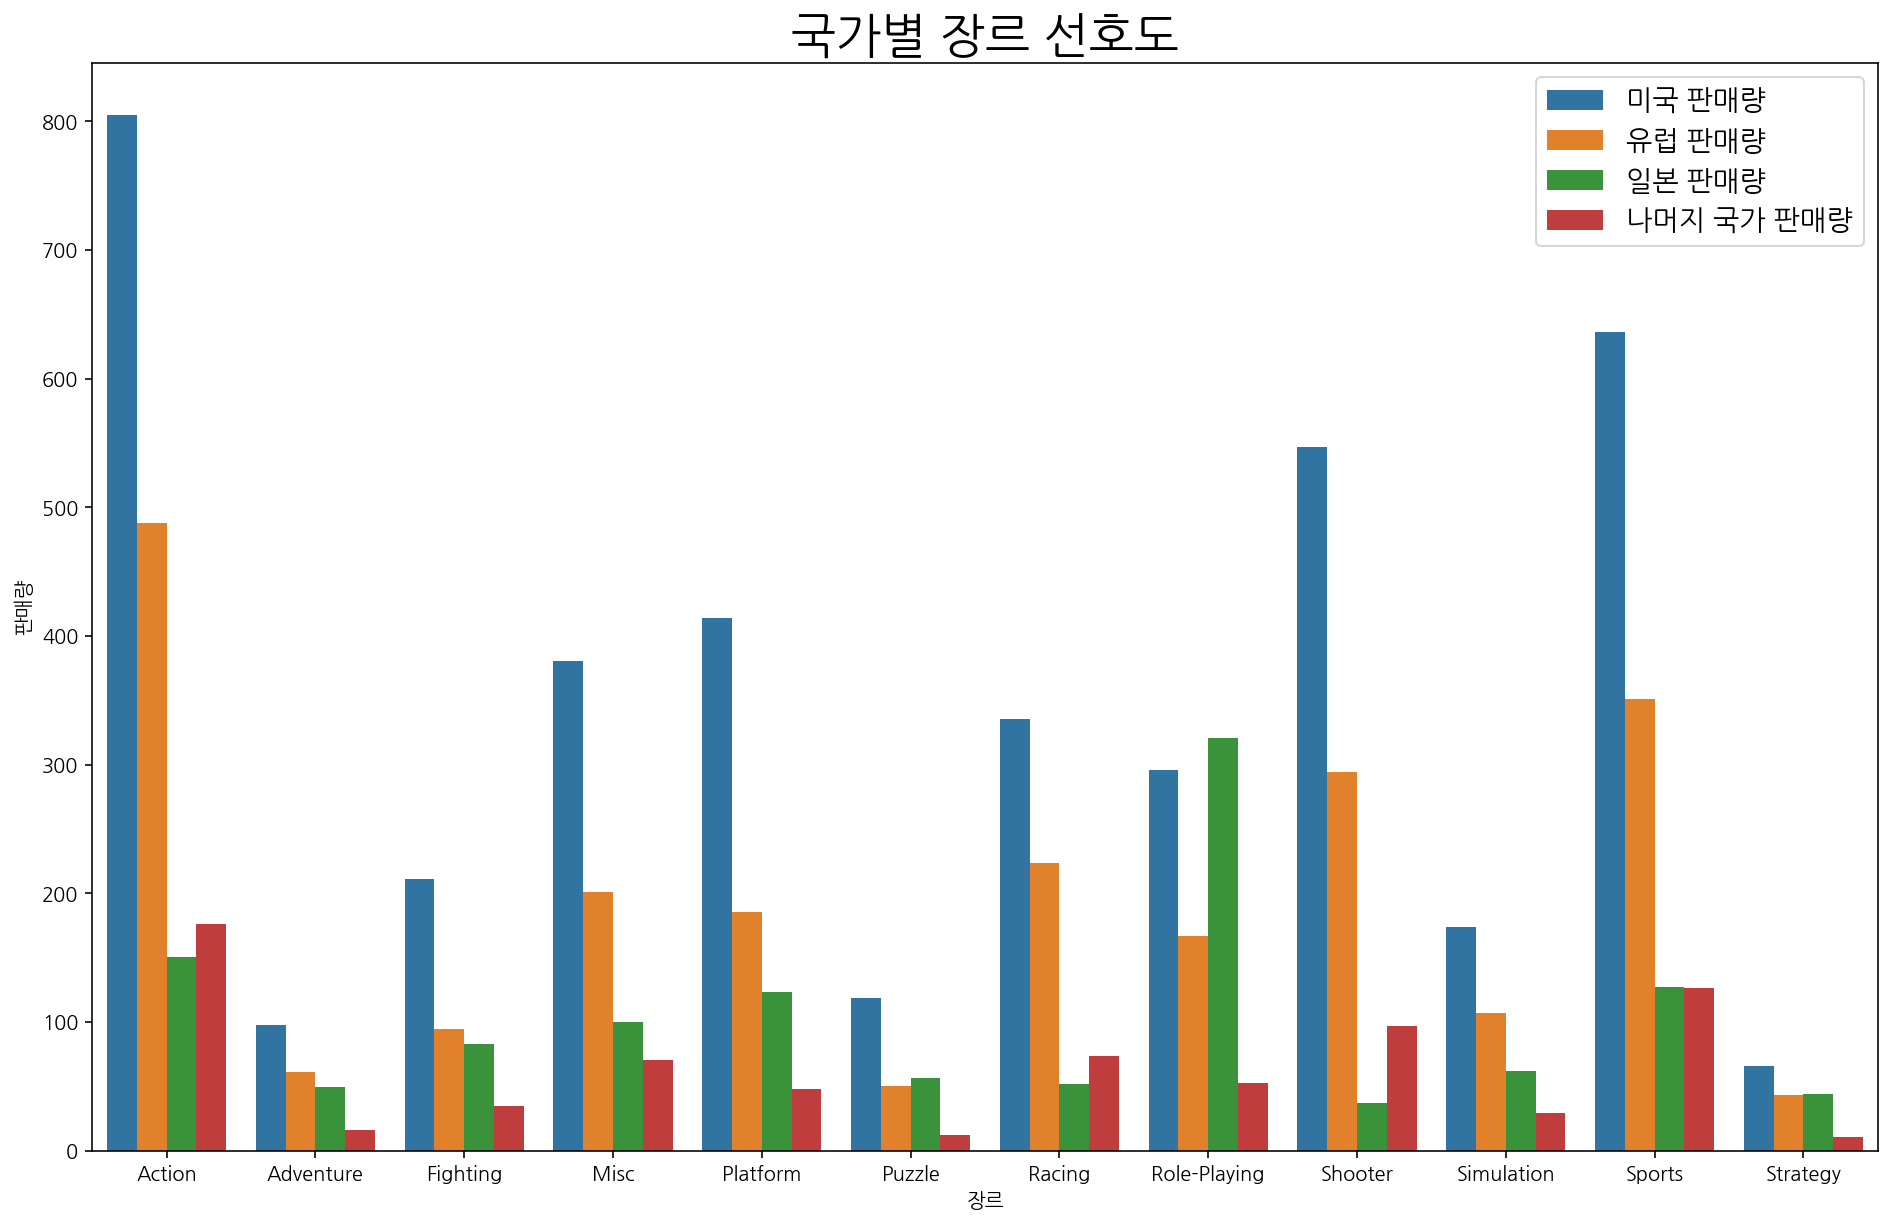

In [17]:
plt.figure(figsize=(16, 10))
sns.barplot(data=temp_melted, x='장르', y='판매량', hue='판매국가')
plt.title('국가별 장르 선호도', loc='center', fontsize=24)
plt.legend(fontsize=14)
plt.show()

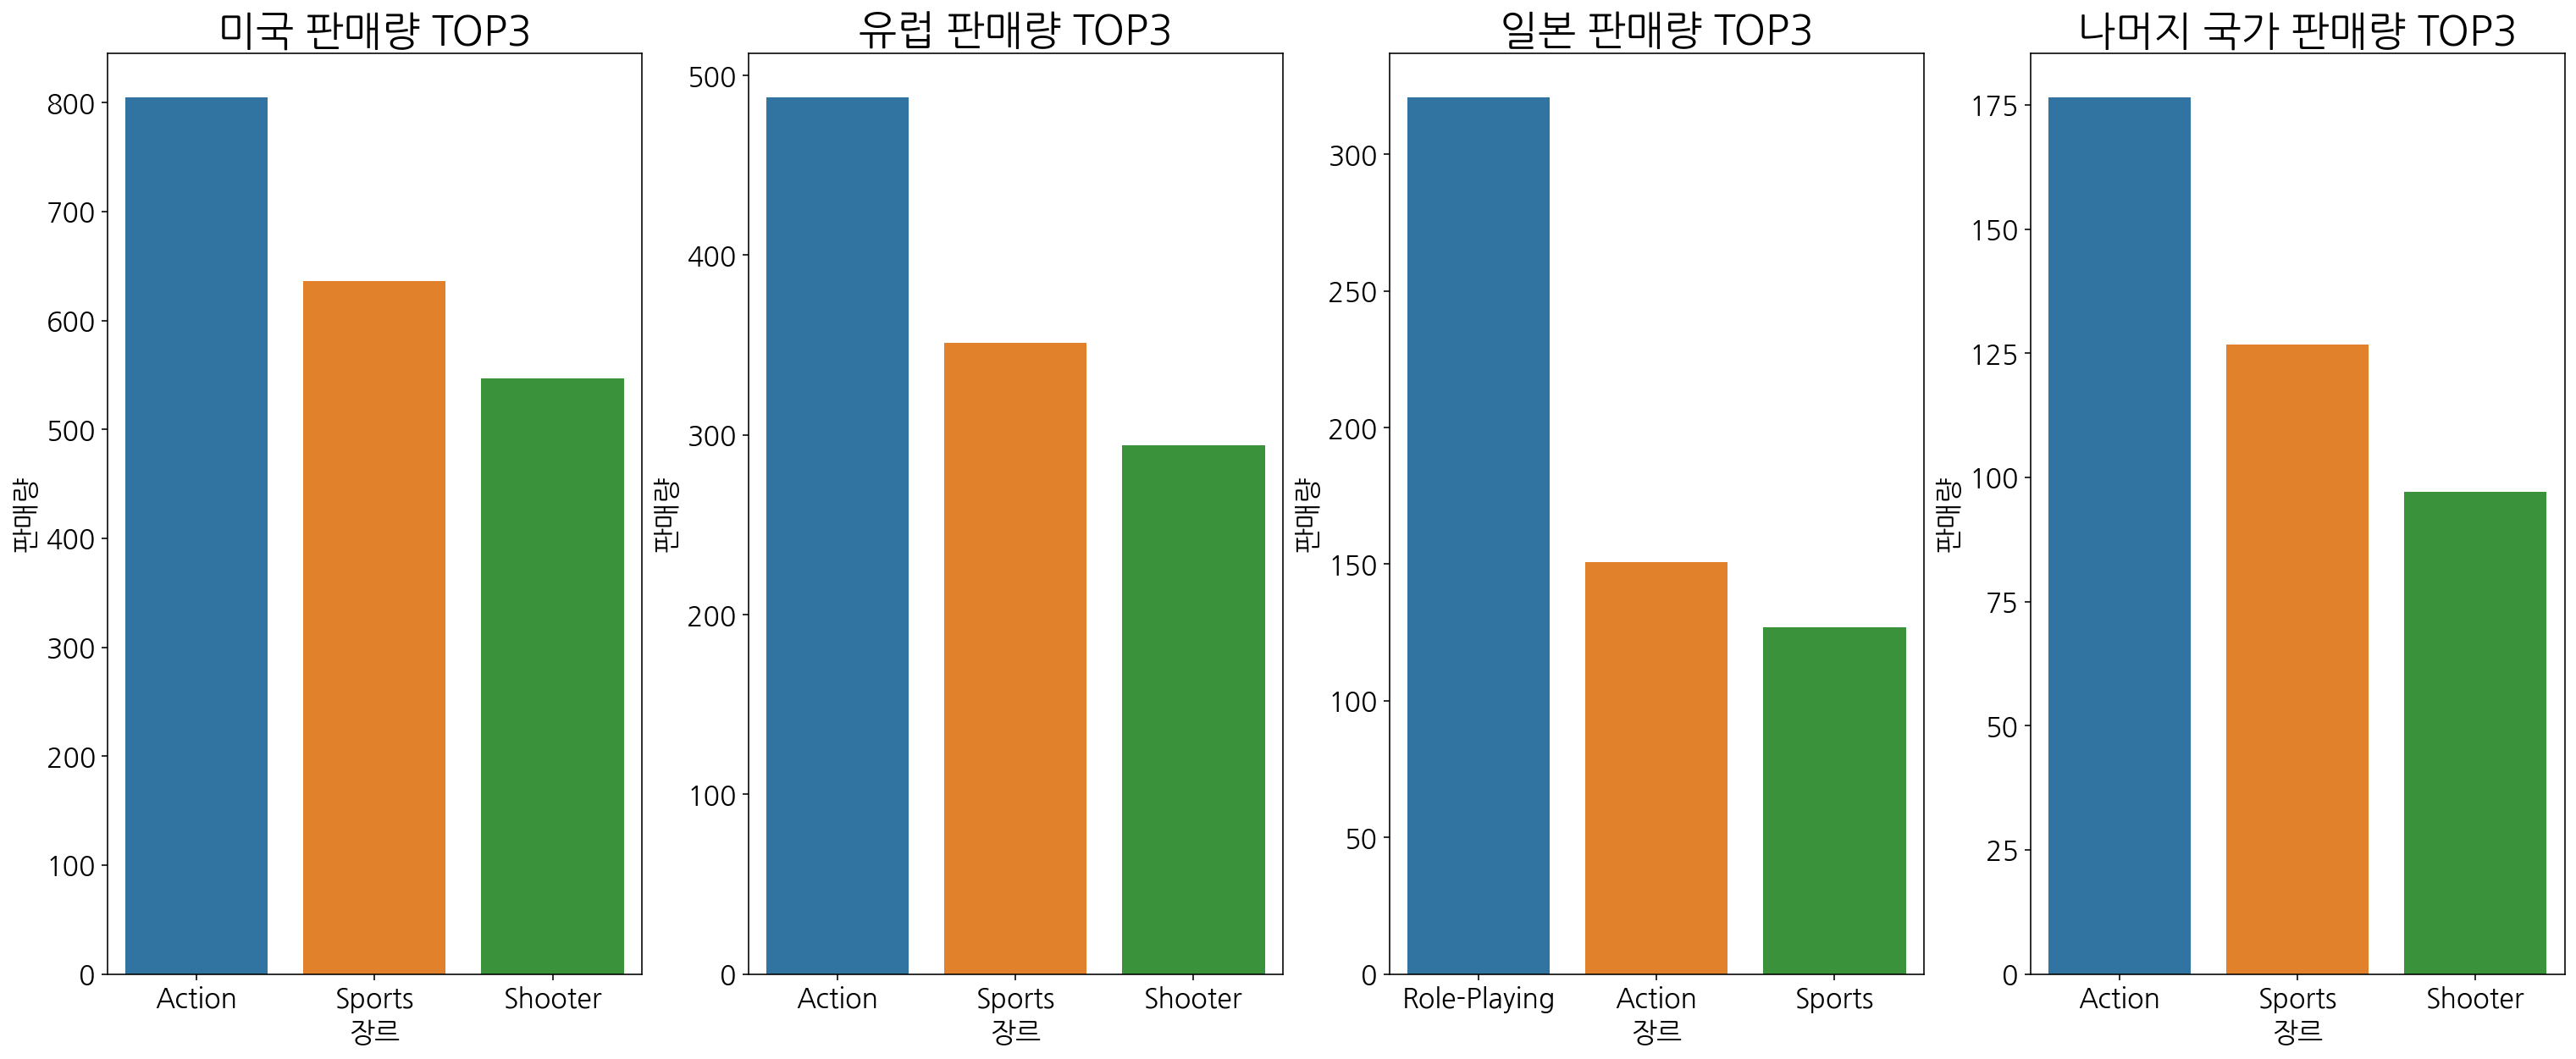

In [18]:
def top3_genre(df, sales_col):
    new_df = df.loc[:, ['장르', sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(3)
    new_df.columns = ['장르', '판매량']
    return new_df

na_genre_top3 = top3_genre(temp_table, '미국 판매량')
eu_genre_top3 = top3_genre(temp_table, '유럽 판매량')
jp_genre_top3 = top3_genre(temp_table, '일본 판매량')
other_genre_top3 = top3_genre(temp_table, '나머지 국가 판매량')

data_list = [na_genre_top3, eu_genre_top3, jp_genre_top3, other_genre_top3]
columns_list = temp_table.columns[1:]

fig, axs = plt.subplots(figsize=(26, 10), nrows=1, ncols=4)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col + ' ' + 'TOP3', fontsize=24)
    sns.barplot(x='장르', y='판매량', data=data, ax=axs[i])
    axs[i].tick_params(axis='both',labelsize=16)
    axs[i].set_xlabel('장르', fontsize=16)
    axs[i].set_ylabel('판매량', fontsize=16)
plt.show()

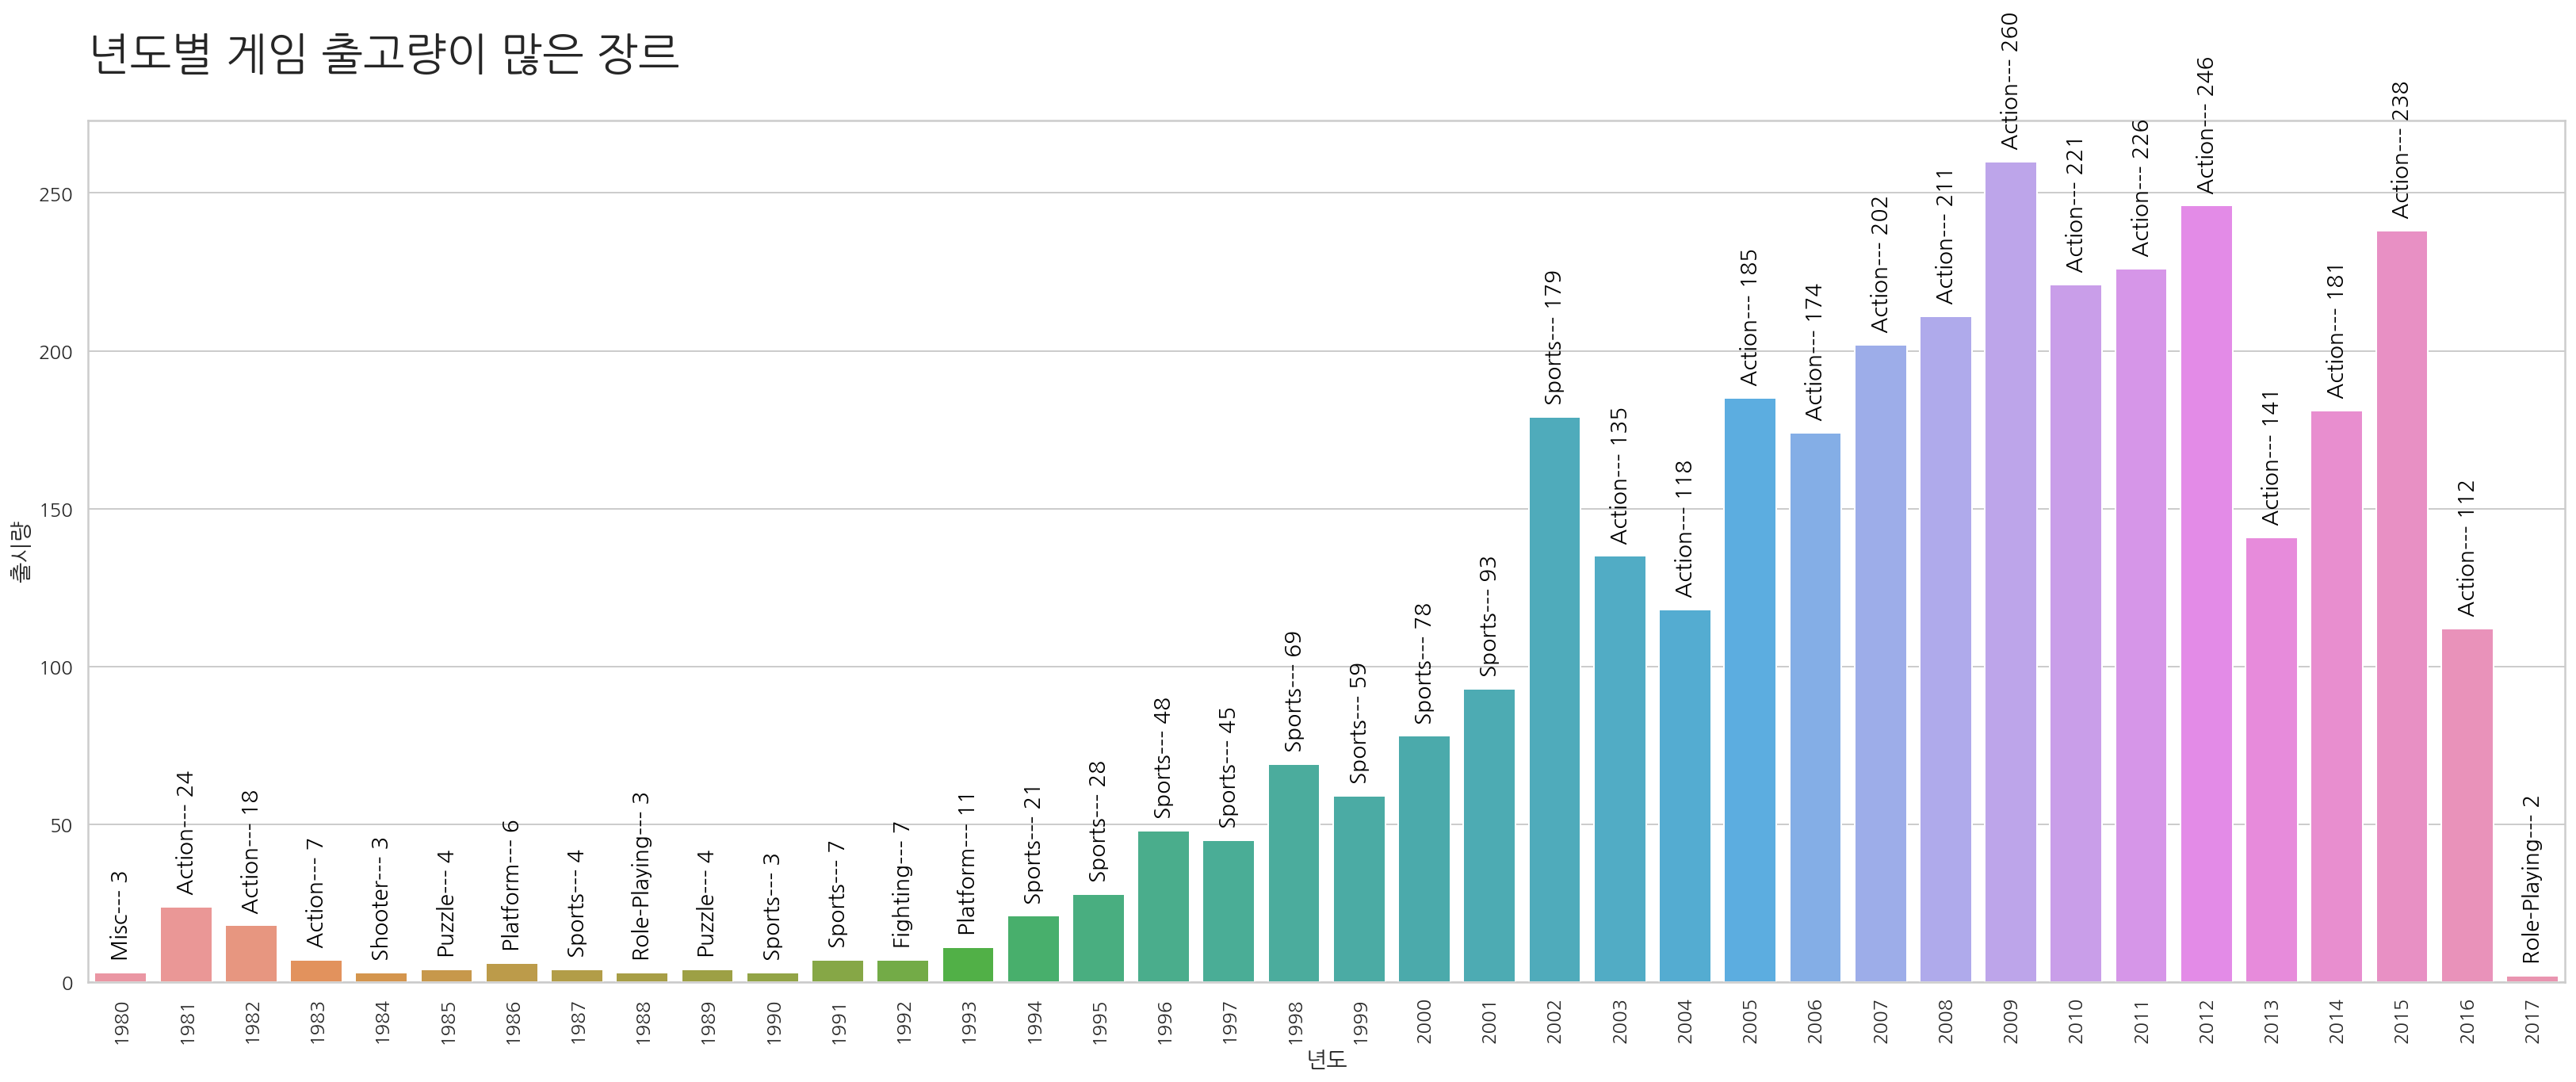

In [19]:

year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')

year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)

year_max_genre = year_max_genre.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_genre[:5]
year_max_genre.columns = ['년도', '장르', '출시량']


genre = year_max_genre['장르'].values


year_max_sales = df.groupby(['Year', 'Genre'])['Total_Sales'].sum().reset_index()
condition = year_max_sales['Total_Sales'] == year_max_sales.groupby(['Year'])['Total_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['년도', '장르', '전세계 판매량']
year_max_sales[:5]

sns.set_context('notebook')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='출시량', data=year_max_genre)
idx = 0
for value in year_max_genre['출시량']:
    ax.text(x=idx, y=value + 5, s=str(genre[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=14)
plt.ylabel('출시량', fontsize=14)
ax.set_title('년도별 게임 출고량이 많은 장르', fontsize=28, y=1.05, loc='left')
plt.show()

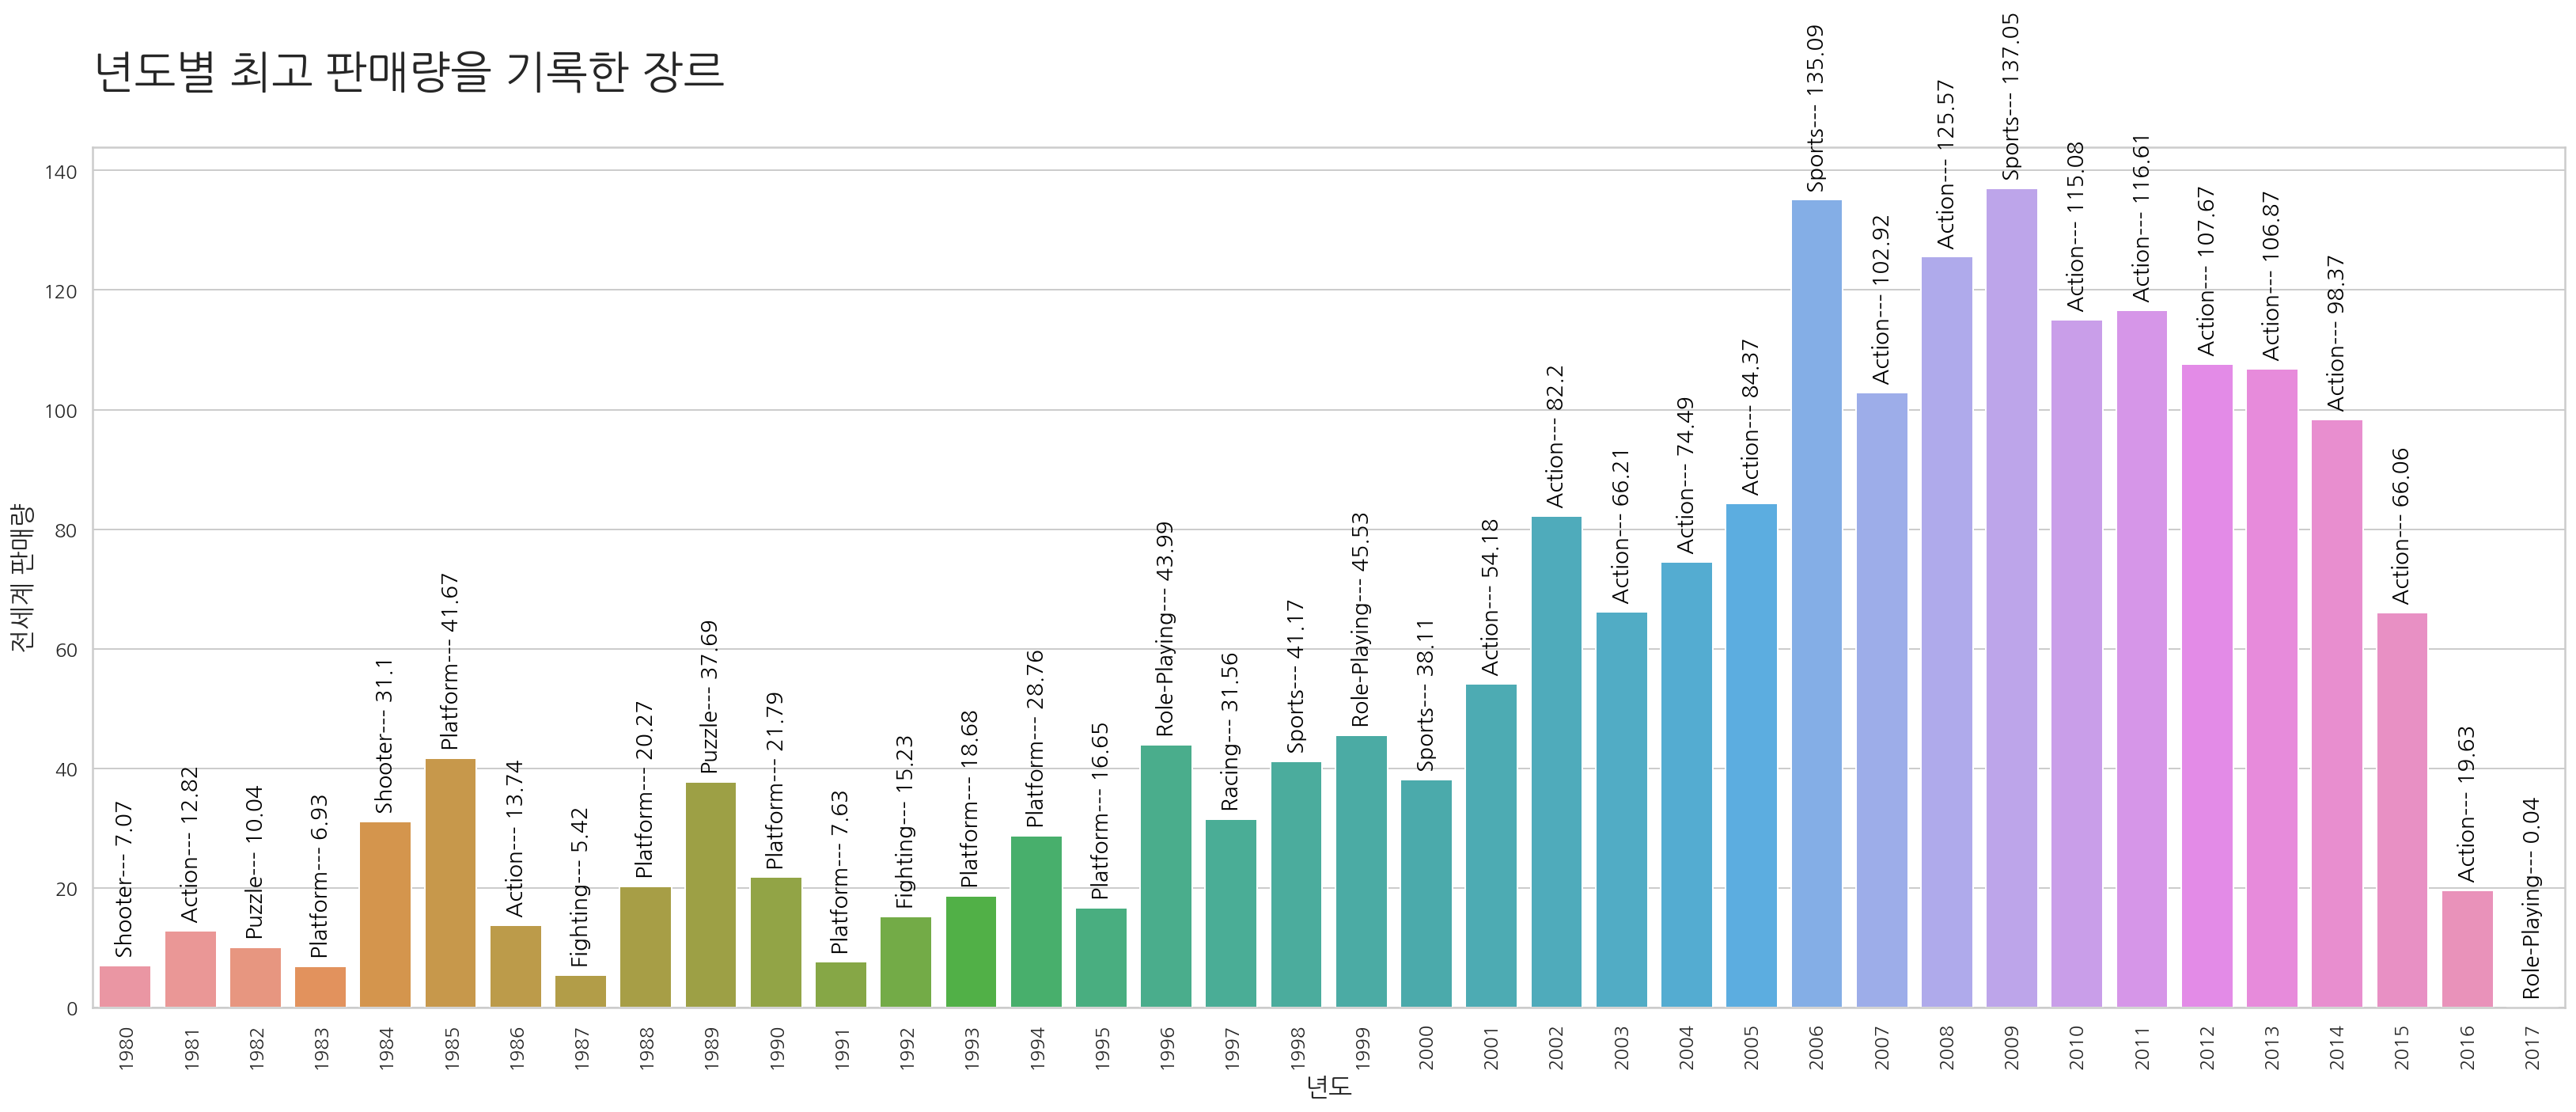

In [20]:
year_max_sales = df.groupby(['Year', 'Genre'])['Total_Sales'].sum().reset_index()
condition = year_max_sales['Total_Sales'] == year_max_sales.groupby(['Year'])['Total_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['년도', '장르', '전세계 판매량']

genre = year_max_sales['장르'].values

plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='전세계 판매량', data=year_max_sales)
idx = 0
for value in year_max_sales['전세계 판매량']:
    ax.text(x=idx, y=value + 2, s=str(genre[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
ax.set_title('년도별 최고 판매량을 기록한 장르', y=1.06, fontsize=28, loc='left')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=16)
plt.ylabel('전세계 판매량', fontsize=16)
plt.show()

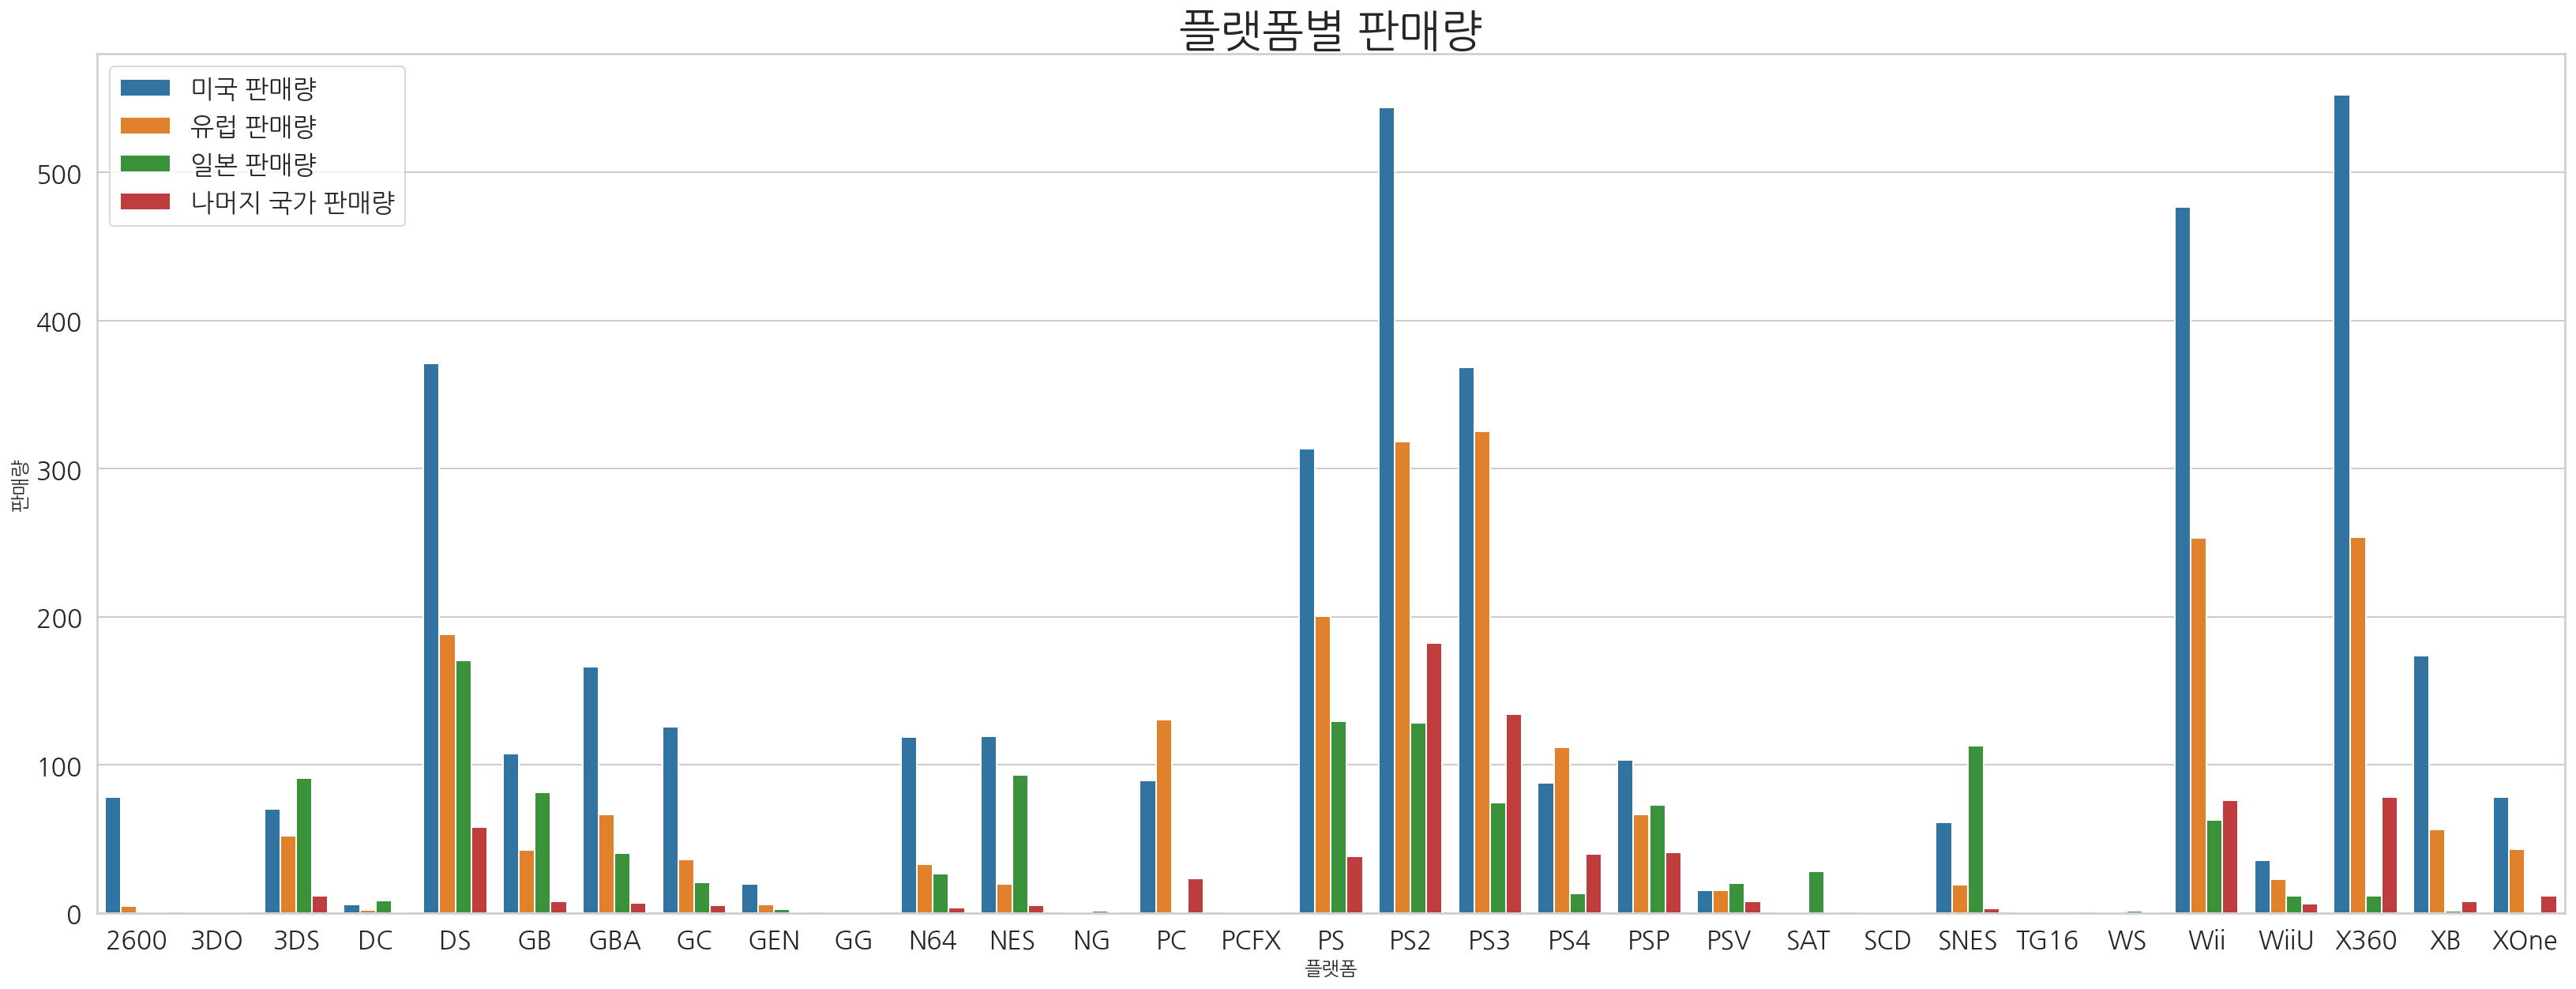

In [21]:

pf_by_sales = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
pf_by_sales.columns = ['플랫폼', '미국 판매량', '유럽 판매량', '일본 판매량', '나머지 국가 판매량']
pf_by_sales_grouped = pf_by_sales.groupby(by=['플랫폼']).sum()
pf_by_sales_df = pf_by_sales_grouped.reset_index()
pf_by_sales_mt = pd.melt(pf_by_sales_df, id_vars=['플랫폼'], value_vars=pf_by_sales.columns[1:],
                         var_name='판매국가', value_name='판매량')


plt.figure(figsize=(28,10))
ax = sns.barplot(x='플랫폼', y='판매량', hue='판매국가', data=pf_by_sales_mt)
ax.set_title('플랫폼별 판매량', fontsize=28)
ax.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

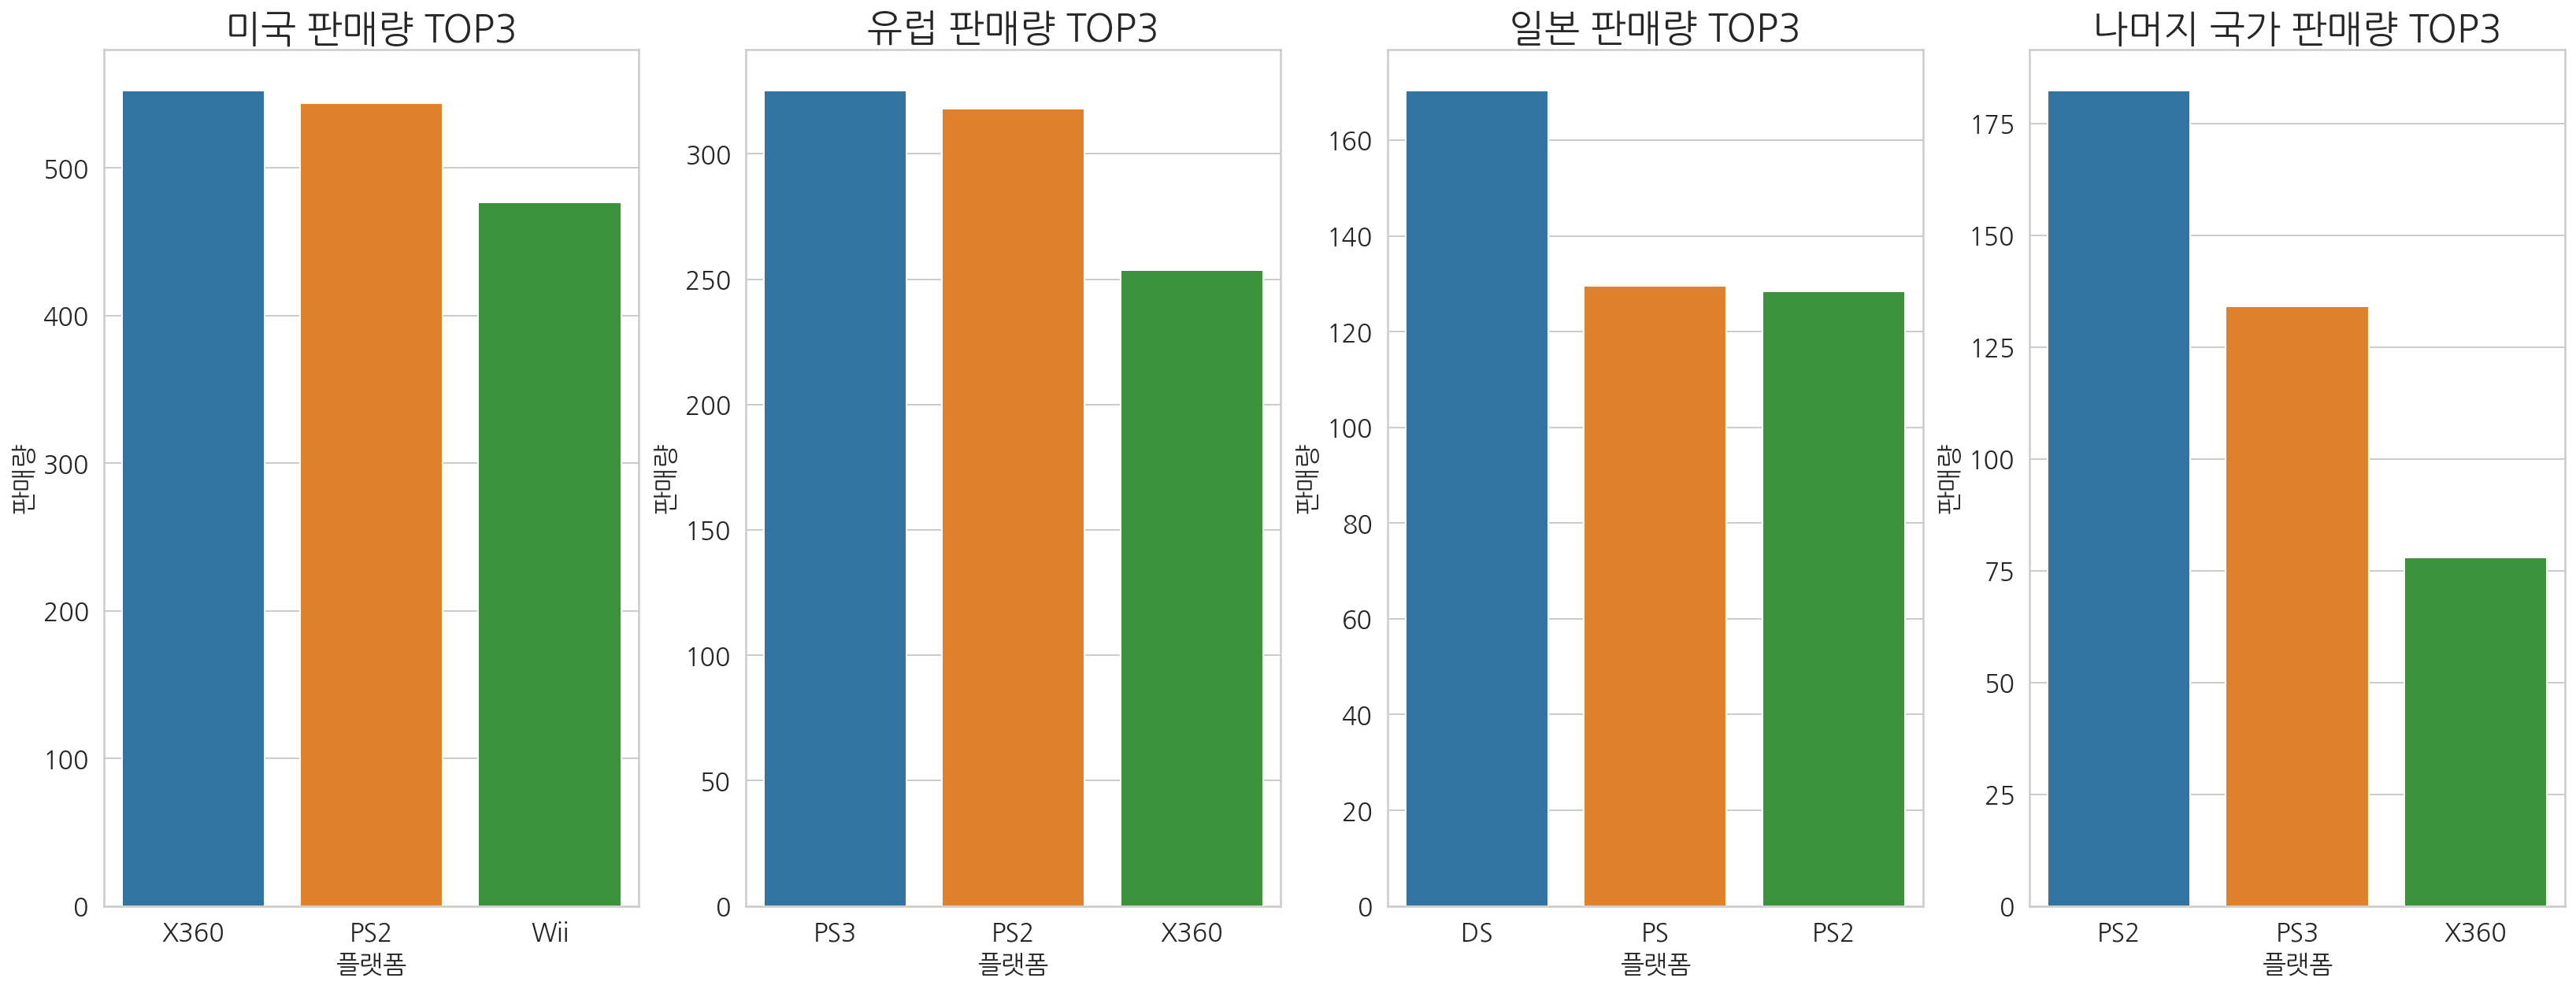

In [22]:
def top3_platform(df, sales_col):
    new_df = df.loc[:, ['플랫폼', sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(3)
    new_df.columns = ['플랫폼', '판매량']
    return new_df
na_platform_t3 = top3_platform(pf_by_sales_df, '미국 판매량')
eu_platform_t3 = top3_platform(pf_by_sales_df, '유럽 판매량')
jp_platform_t3 = top3_platform(pf_by_sales_df, '일본 판매량')
other_platform_t3 = top3_platform(pf_by_sales_df, '나머지 국가 판매량')

data_list = [na_platform_t3, eu_platform_t3, jp_platform_t3, other_platform_t3]
columns_list = pf_by_sales.columns[1:]

fig, axs = plt.subplots(figsize=(28, 10), nrows=1, ncols=4)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col + ' ' + 'TOP3', fontsize=24)
    sns.barplot(x='플랫폼', y='판매량', data=data, ax=axs[i])
    axs[i].tick_params(labelsize=16)
    axs[i].set_xlabel('플랫폼', fontsize=16)
    axs[i].set_ylabel('판매량', fontsize=16)
    
plt.show()

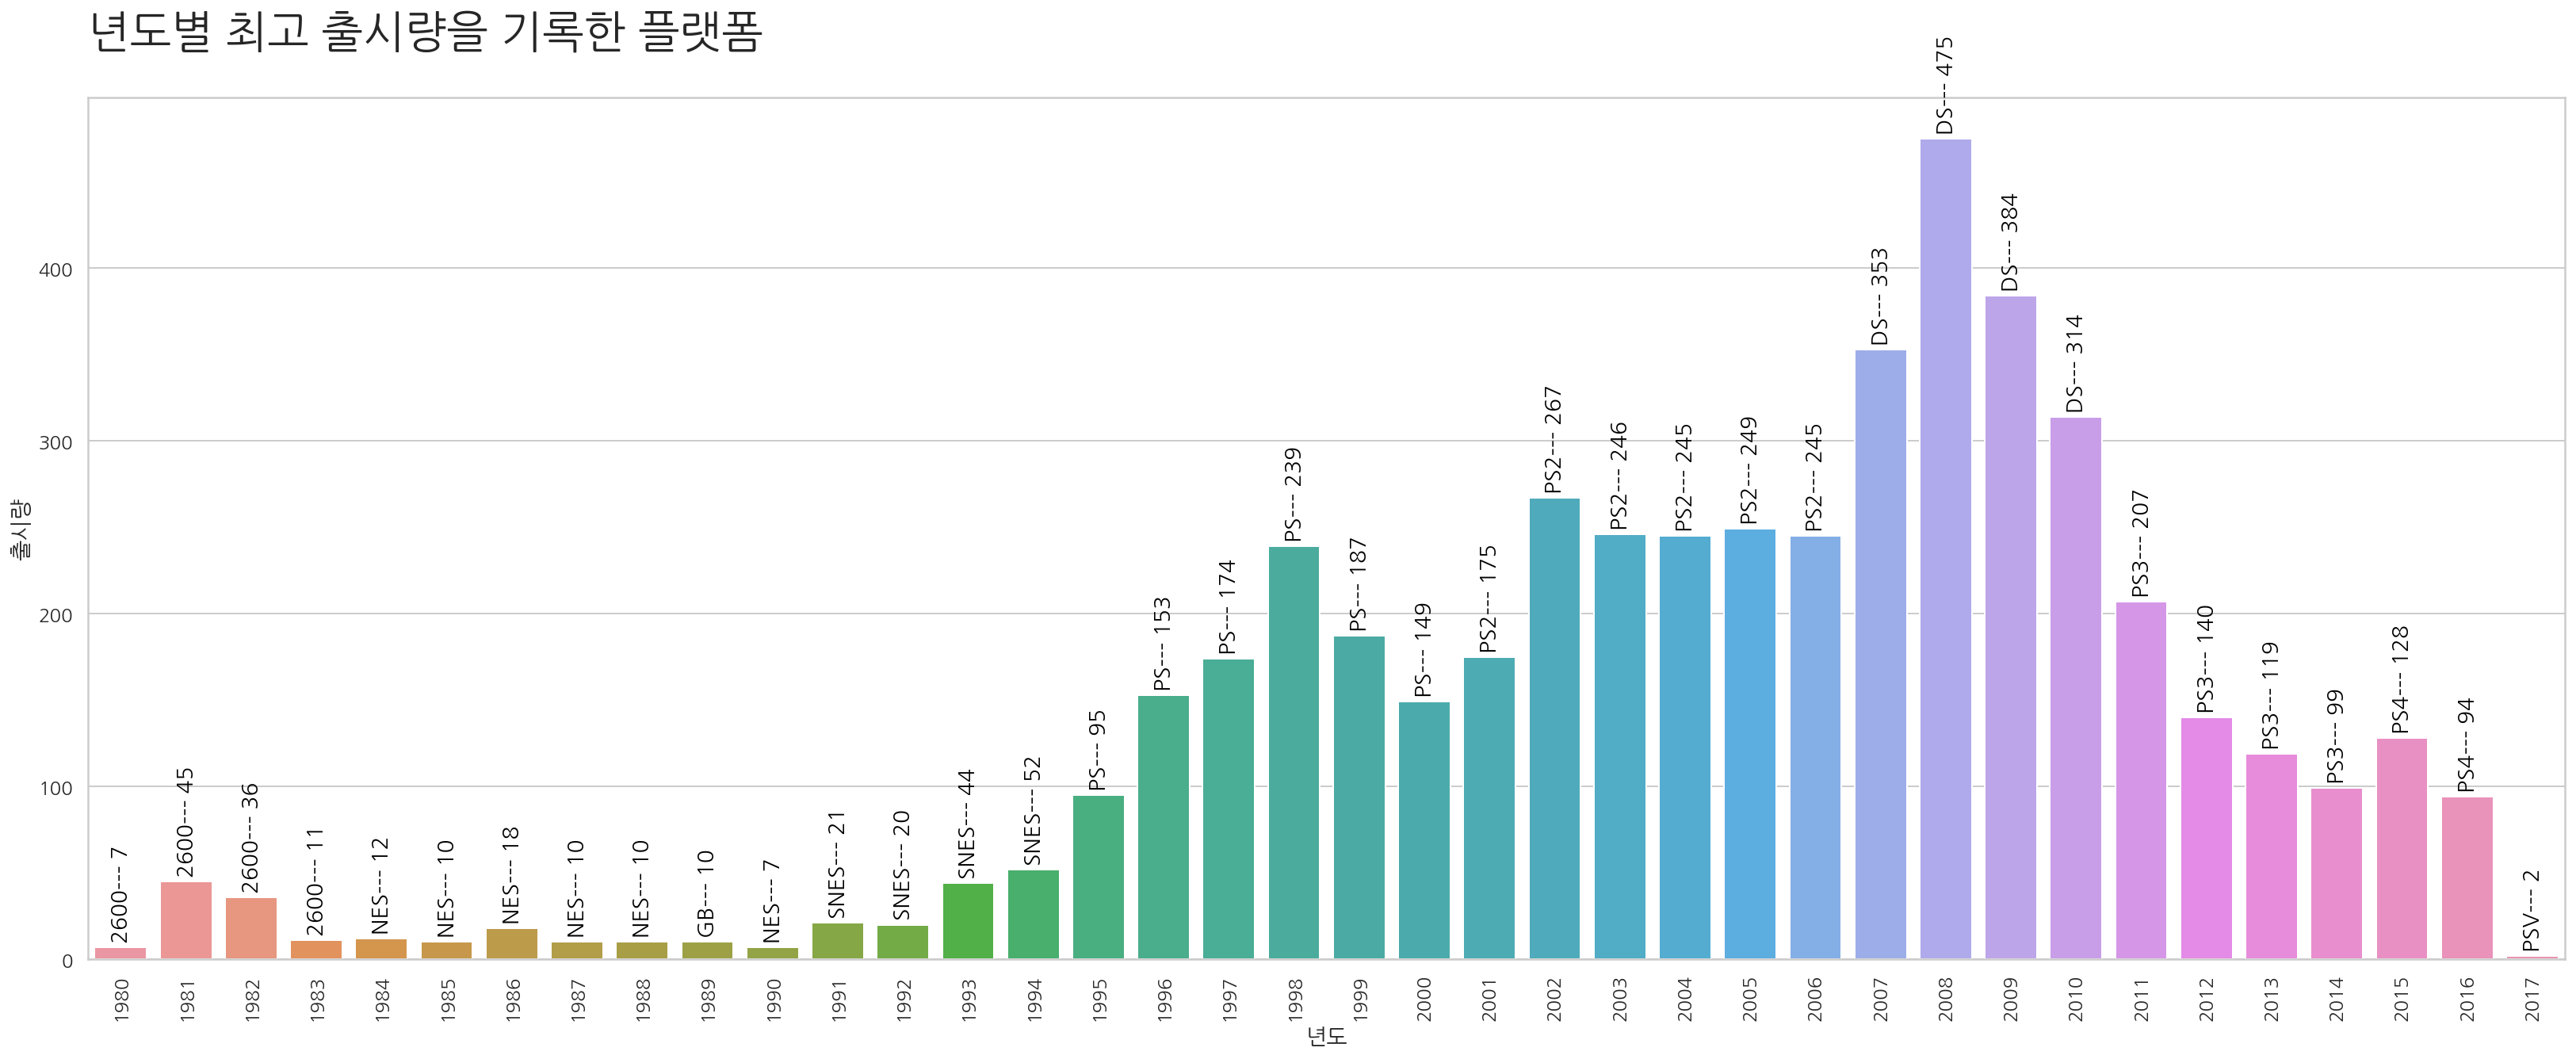

In [23]:

year_max_pf = df.groupby(['Year', 'Platform']).size().reset_index(name='count')

condition = year_max_pf.groupby(['Year'])['count'].transform(max) == year_max_pf['count']
year_max_pf = year_max_pf[condition].reset_index(drop=True)

year_max_pf = year_max_pf.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_pf.columns = ['년도', '플랫폼', '출시량']

platform = year_max_pf['플랫폼'].values

plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='출시량', data=year_max_pf)
idx = 0
for value in year_max_pf['출시량']:
    ax.text(x=idx, y=value + 5, s=str(platform[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=14)
plt.ylabel('출시량', fontsize=14)
ax.set_title('년도별 최고 출시량을 기록한 플랫폼', fontsize=28, y=1.05, loc='left')
plt.show()

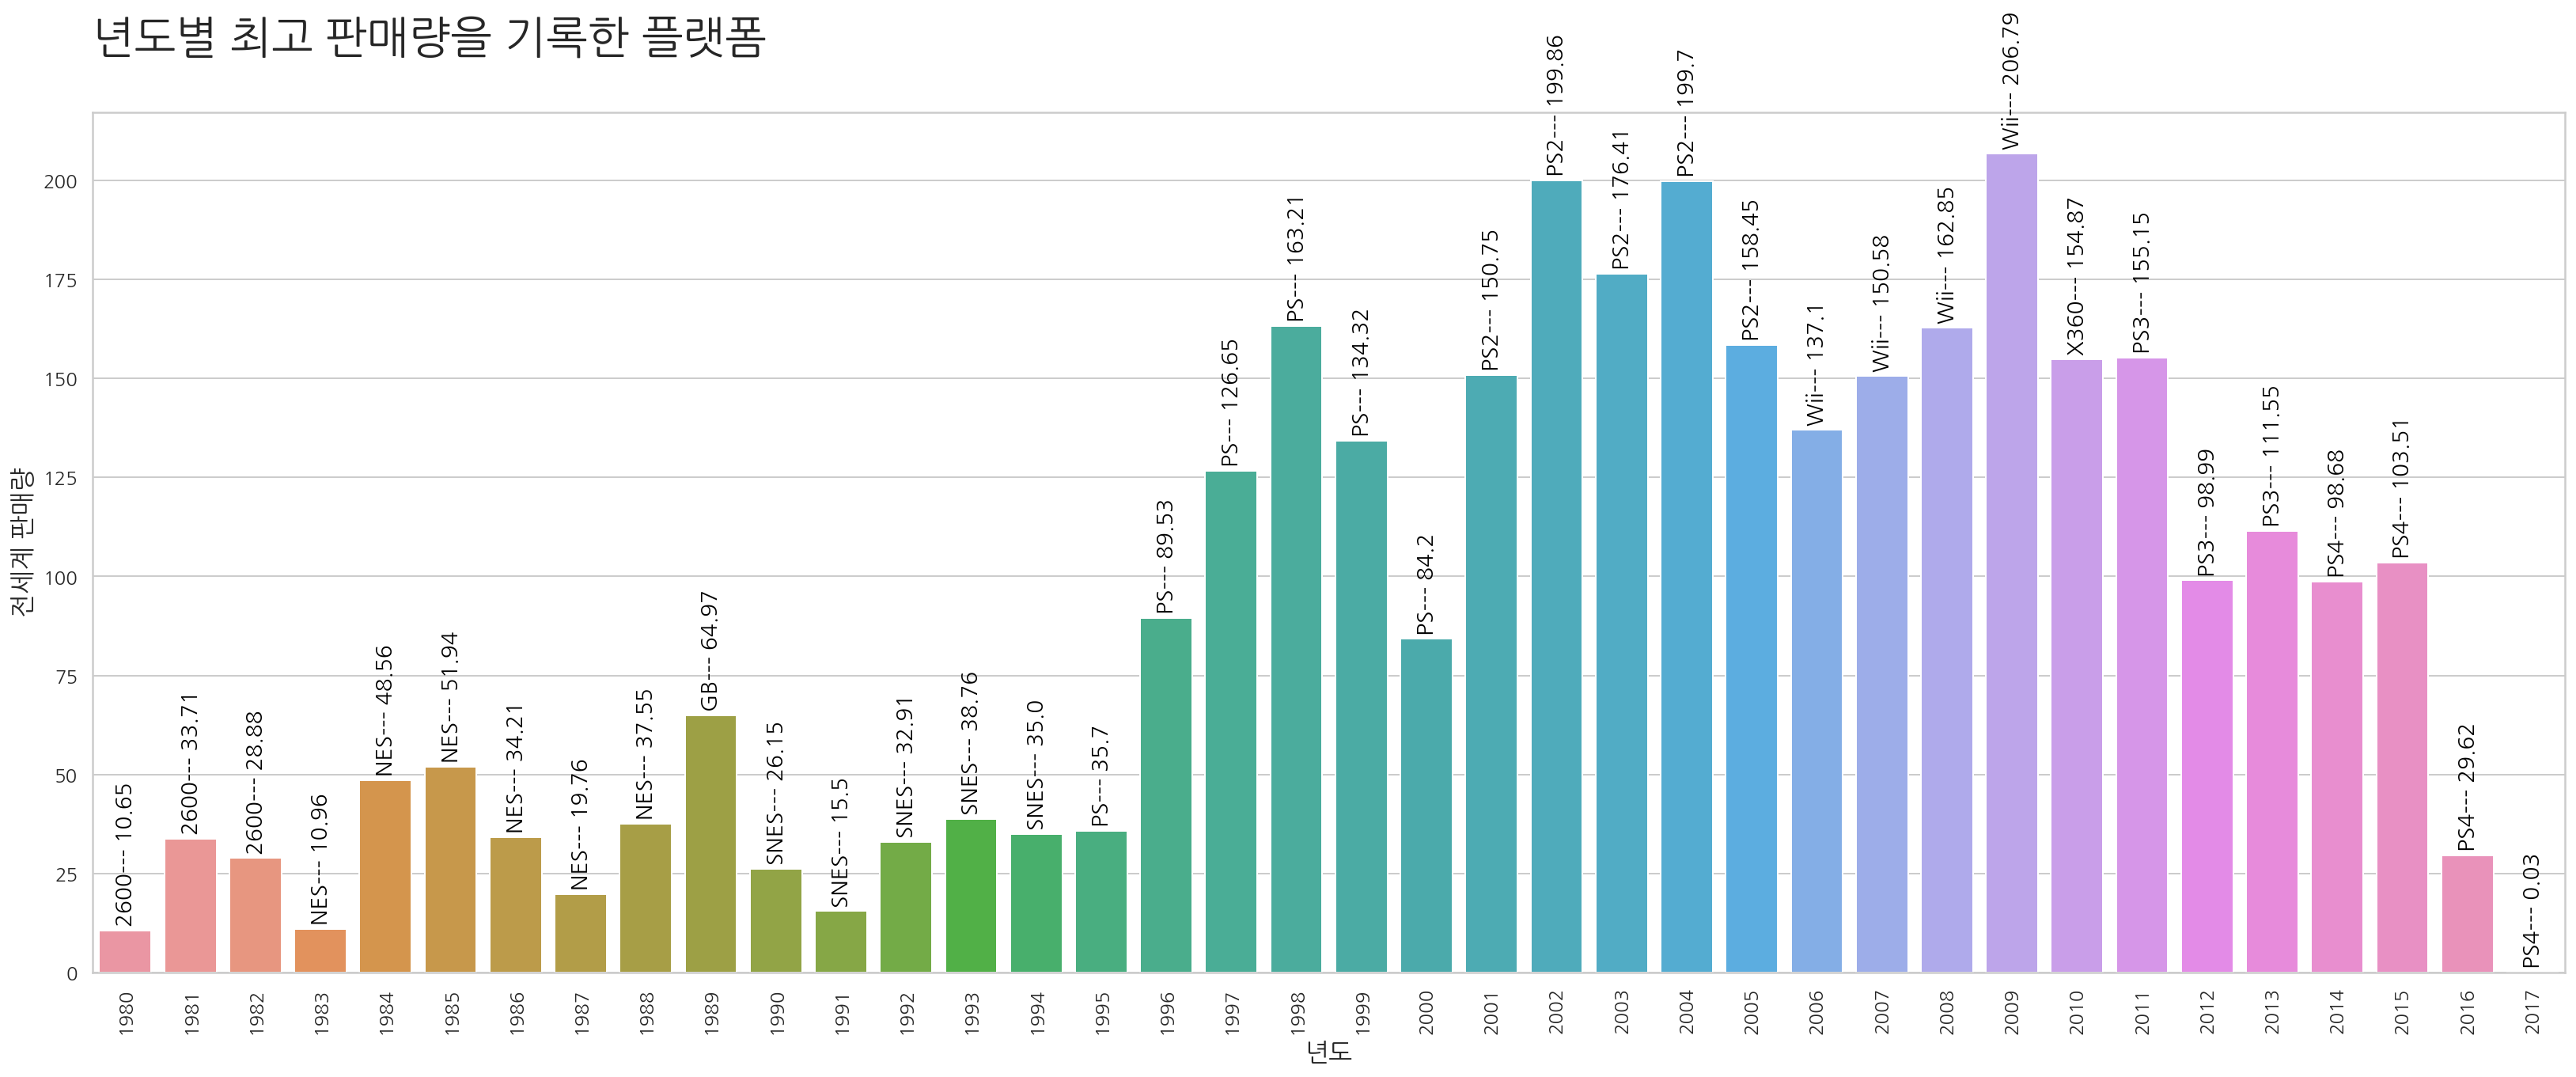

In [24]:
year_max_sales = df.groupby(['Year', 'Platform'])['Total_Sales'].sum().reset_index()
condition = year_max_sales['Total_Sales'] == year_max_sales.groupby(['Year'])['Total_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['년도', '플랫폼', '전세계 판매량']
year_max_sales[:5]

platform = year_max_sales['플랫폼'].values

plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='전세계 판매량', data=year_max_sales)
idx = 0
for value in year_max_sales['전세계 판매량']:
    ax.text(x=idx, y=value + 2, s=str(platform[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
ax.set_title('년도별 최고 판매량을 기록한 플랫폼', y=1.06, fontsize=28, loc='left')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=16)
plt.ylabel('전세계 판매량', fontsize=16)
plt.show()

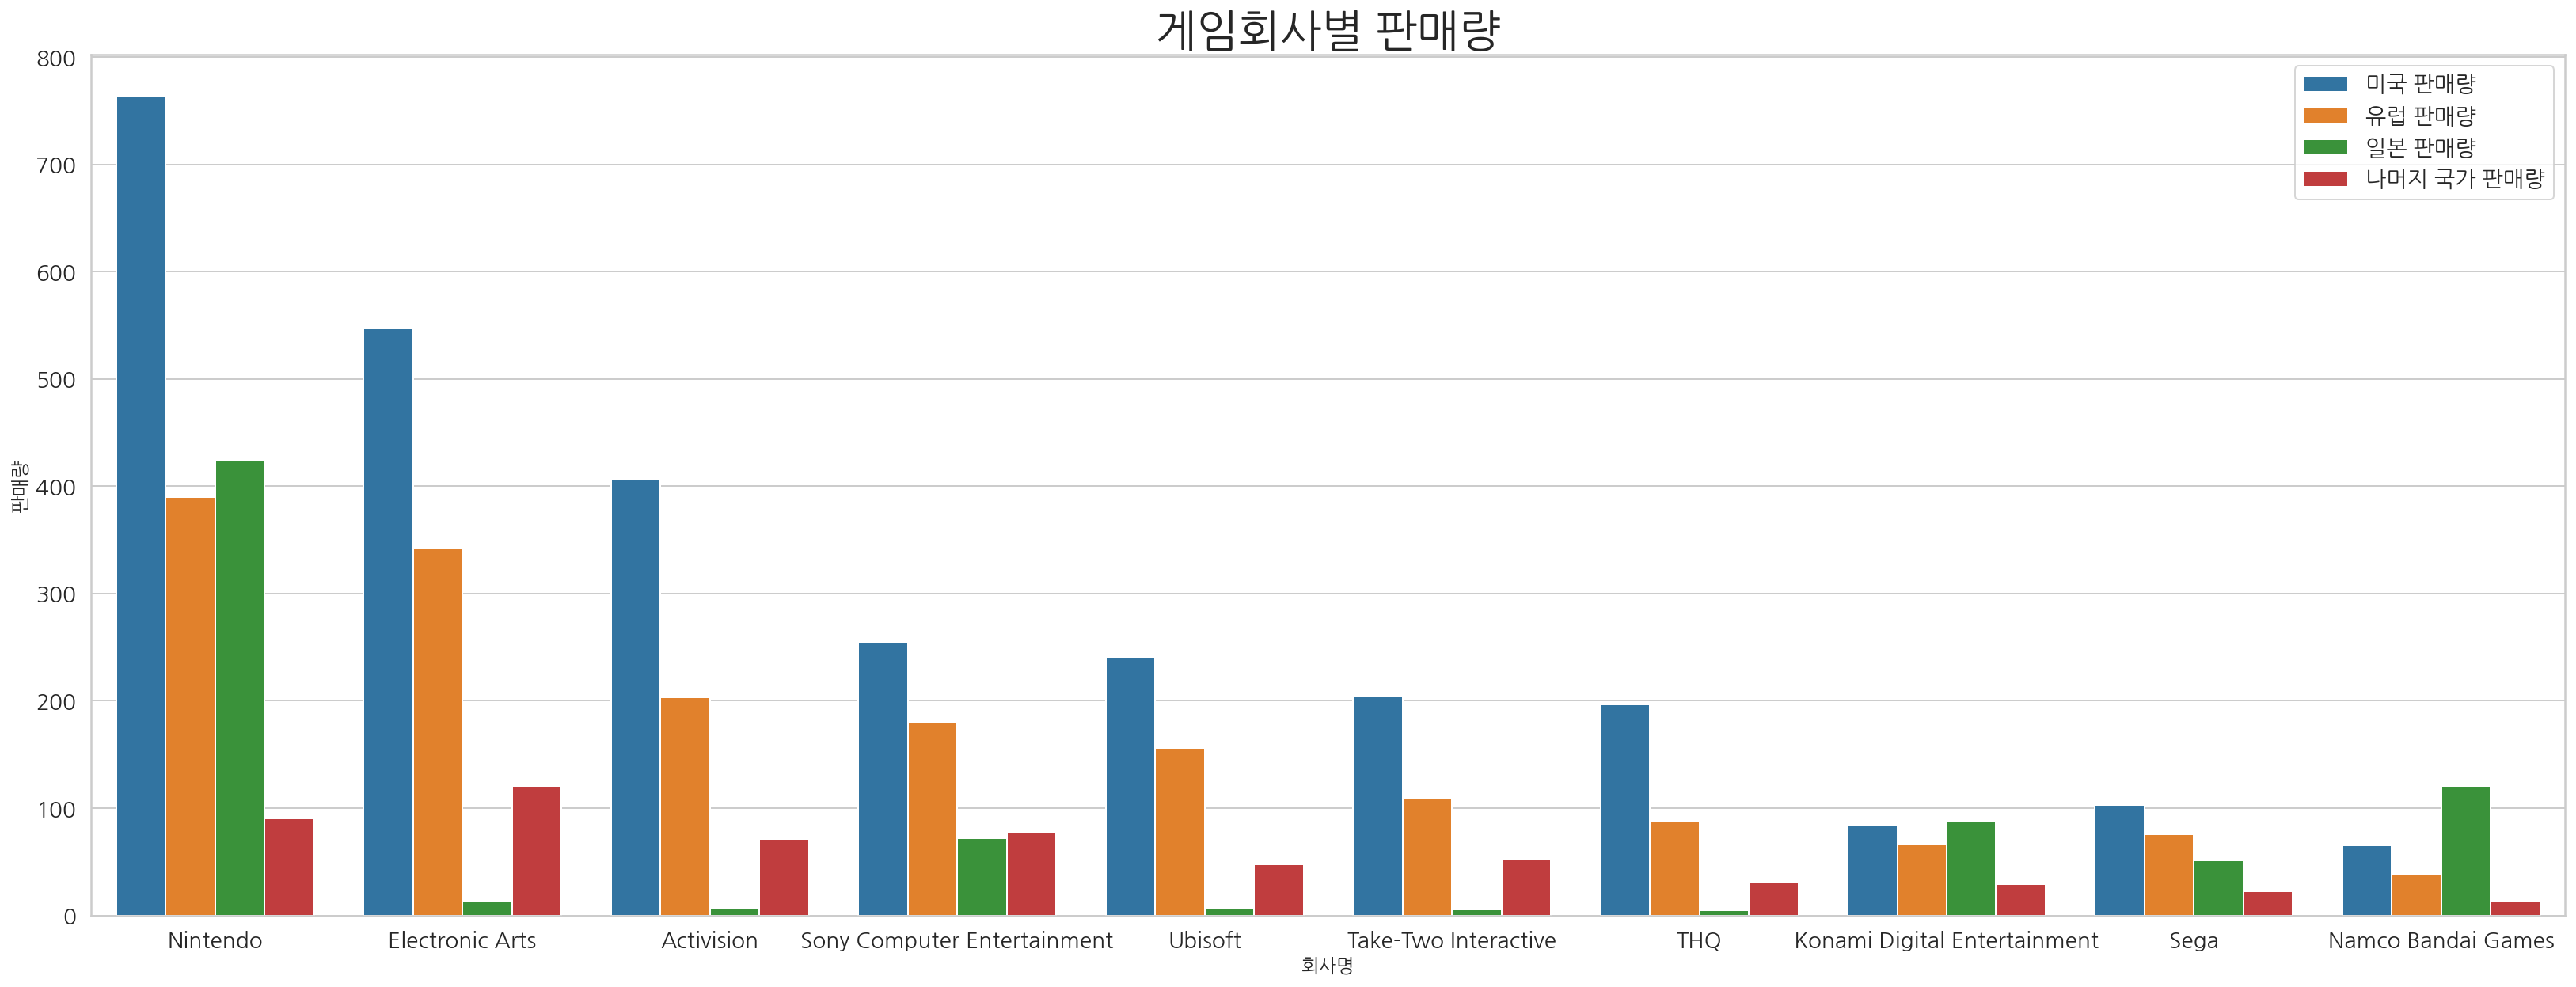

In [25]:
publisher_by_sales = df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']]
publisher_by_sales.columns = ['회사명', '미국 판매량', '유럽 판매량', '일본 판매량', '나머지 국가 판매량', '전세계 판매량']

publisher_by_sales_grouped = publisher_by_sales.groupby(by=['회사명']).sum()

publisher_by_sales_df = publisher_by_sales_grouped.reset_index().sort_values(by=['전세계 판매량'], ascending=False).head(10)
publisher_by_sales_mt = pd.melt(publisher_by_sales_df, id_vars=['회사명'], value_vars=publisher_by_sales.columns[1:-1],
                         var_name='판매국가', value_name='판매량')


plt.figure(figsize=(28,10))
ax = sns.barplot(x='회사명', y='판매량', hue='판매국가', data=publisher_by_sales_mt)
ax.set_title('게임회사별 판매량', fontsize=28)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
plt.show() 

In [26]:
sales_top10 = df.loc[df.Total_Sales.sort_values(ascending=False).index].reset_index(drop=True).head(10)
rank = [str(x)+' 위' for x in range(1, 11)]
sales_top10['rank'] = rank
sales_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,rank
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1 위
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2 위
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3 위
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4 위
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5 위
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6 위
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7 위
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,8 위
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,9 위
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,10 위


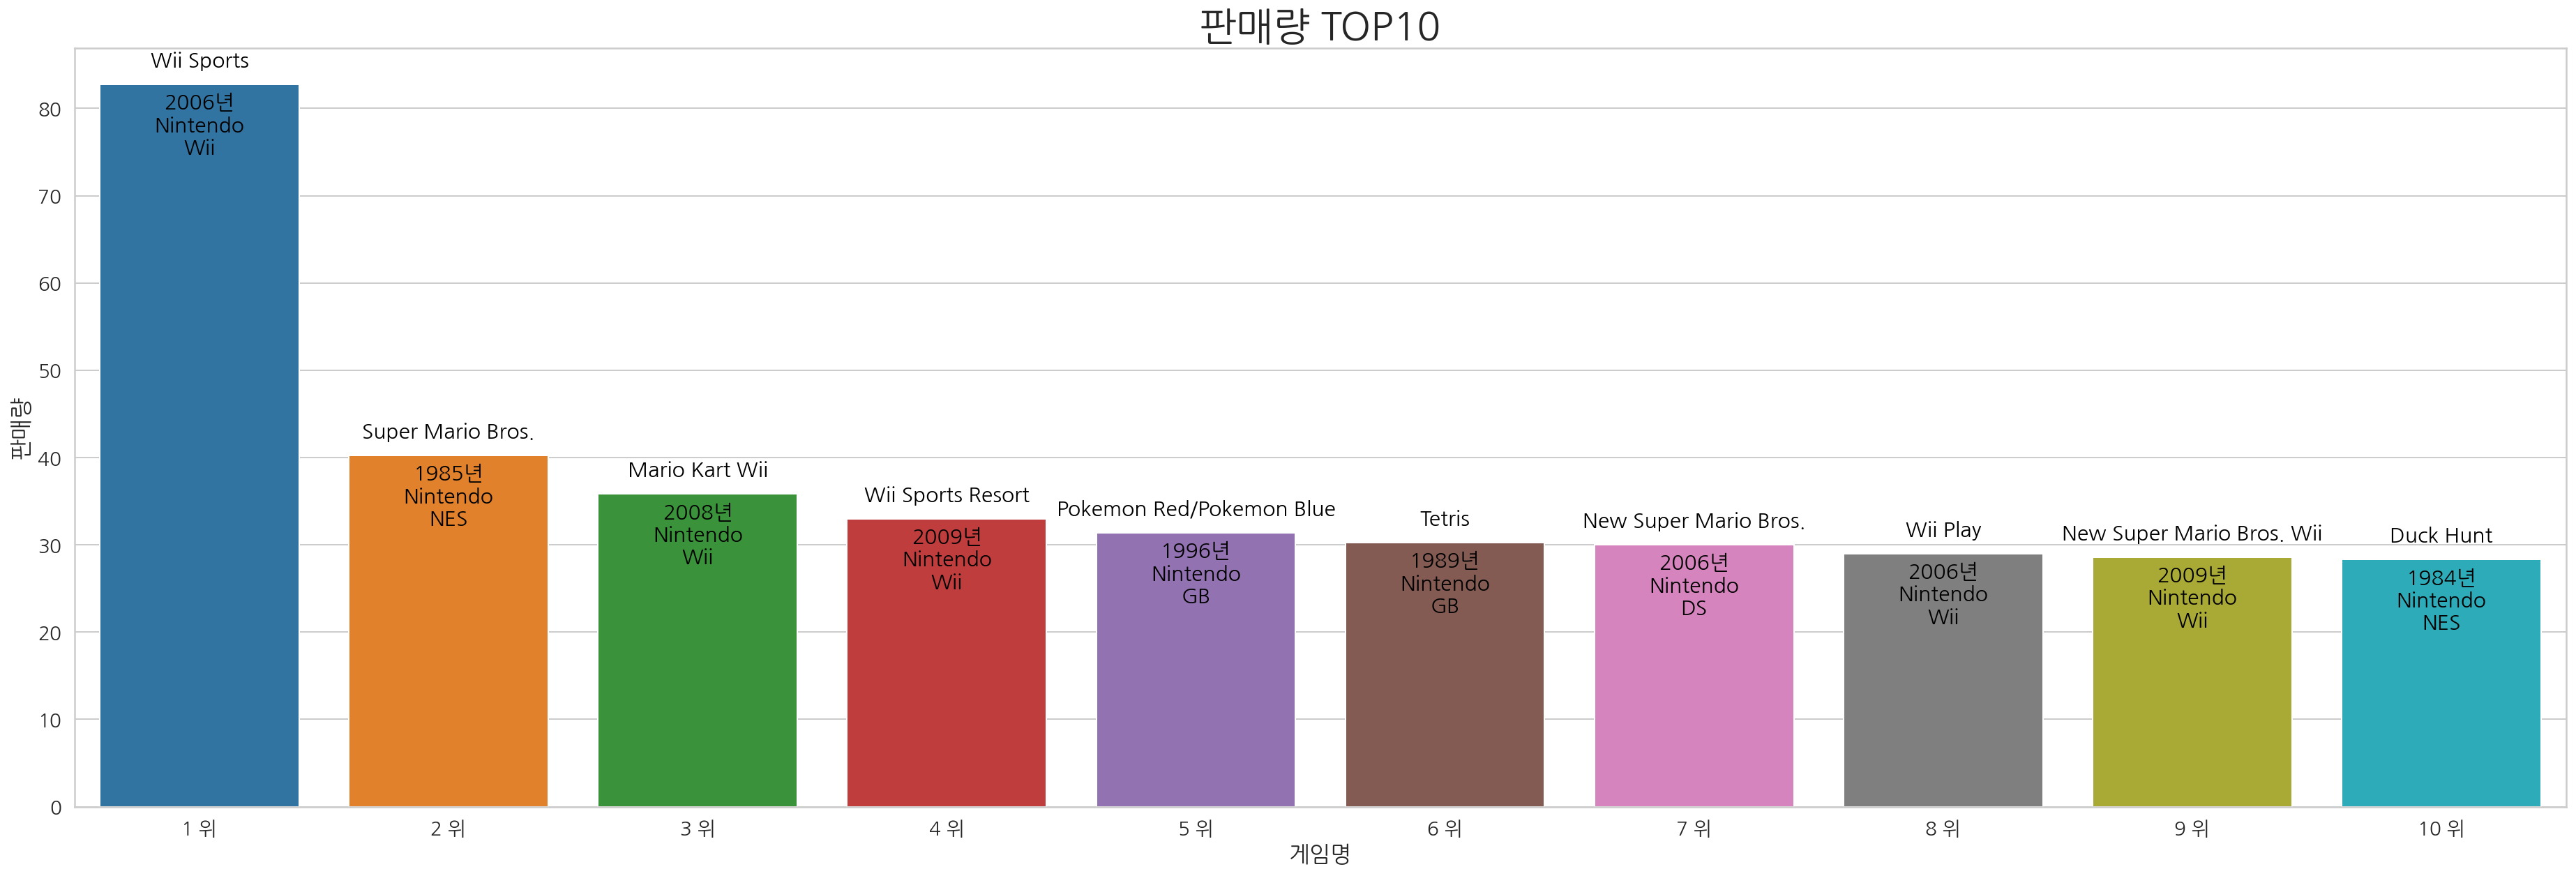

In [27]:
plt.figure(figsize=(32,10))
a = sns.barplot(x='rank', y='Total_Sales', data=sales_top10)
i = 0
for name, year, val, platform, publisher in zip(sales_top10.Name, sales_top10.Year, sales_top10.Total_Sales, 
                                                sales_top10.Platform, sales_top10.Publisher):
    a.text(x=i, y=val+2, s=(name), color='black', ha='center', fontsize=15)
    a.text(x=i, y=val-8, s=(str(year) + '년' + '\n' + publisher + '\n' + platform), color='black', ha='center', fontsize=15)
    i+=1
a.set_title('판매량 TOP10', fontsize=28)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('게임명', fontsize=16)
plt.ylabel('판매량', fontsize=16)
plt.show()

In [28]:
year_sales_top_game = df[df.Year >= 2011].sort_values('Total_Sales', ascending=False).head(10)
year_sales_top_game = year_sales_top_game.reset_index(drop=True)
year_sales_top_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
3,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
4,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
5,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
6,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
7,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
8,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
9,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79


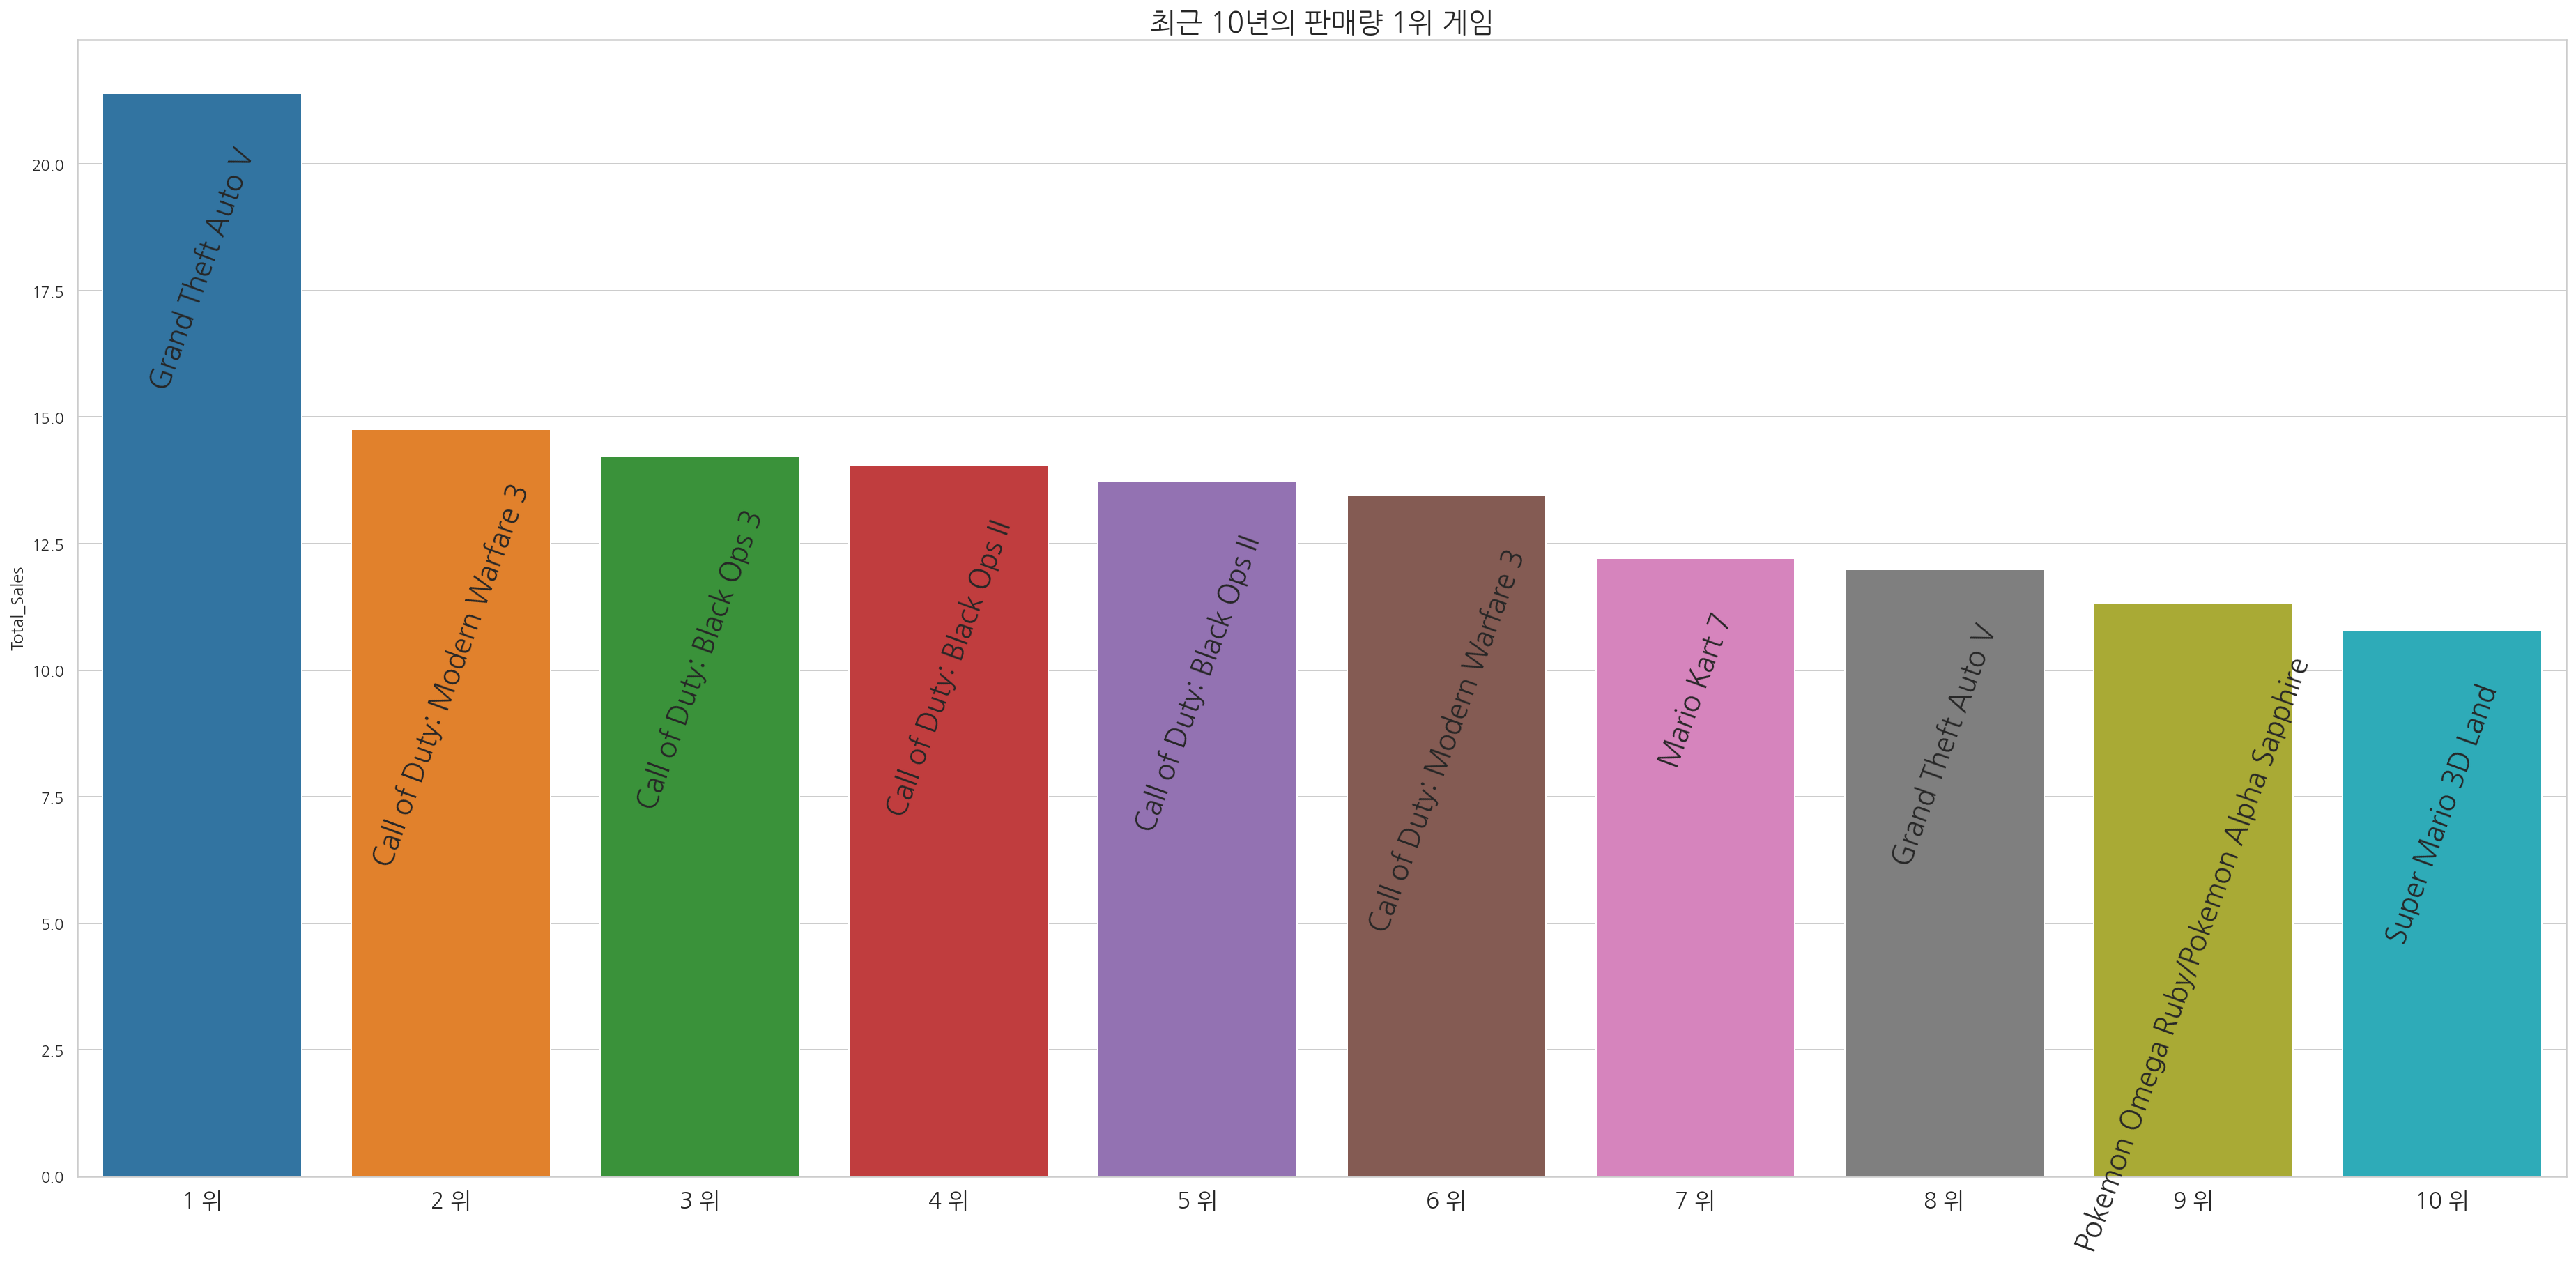

In [29]:
plt.figure(figsize=(32, 15))
a = sns.barplot(x = year_sales_top_game.index, y='Total_Sales', data=year_sales_top_game)
i = 0
for name, val in zip(year_sales_top_game.Name, year_sales_top_game.Total_Sales):
    if val >= 7:
        a.text(x=i, y=val-1, s=(name), ha='center',va='top', fontsize=20, rotation=70)
    else:
        a.text(x=i, y=val+1, s=(name), ha='center', fontsize=20, rotation=70)
    
    i+=1
a.set_title('최근 10년의 판매량 1위 게임', fontsize=20)
plt.xticks(ticks=[x for x in range(10)], labels=[str(x)+' 위' for x in range(1, 11)], fontsize=16)
plt.show()

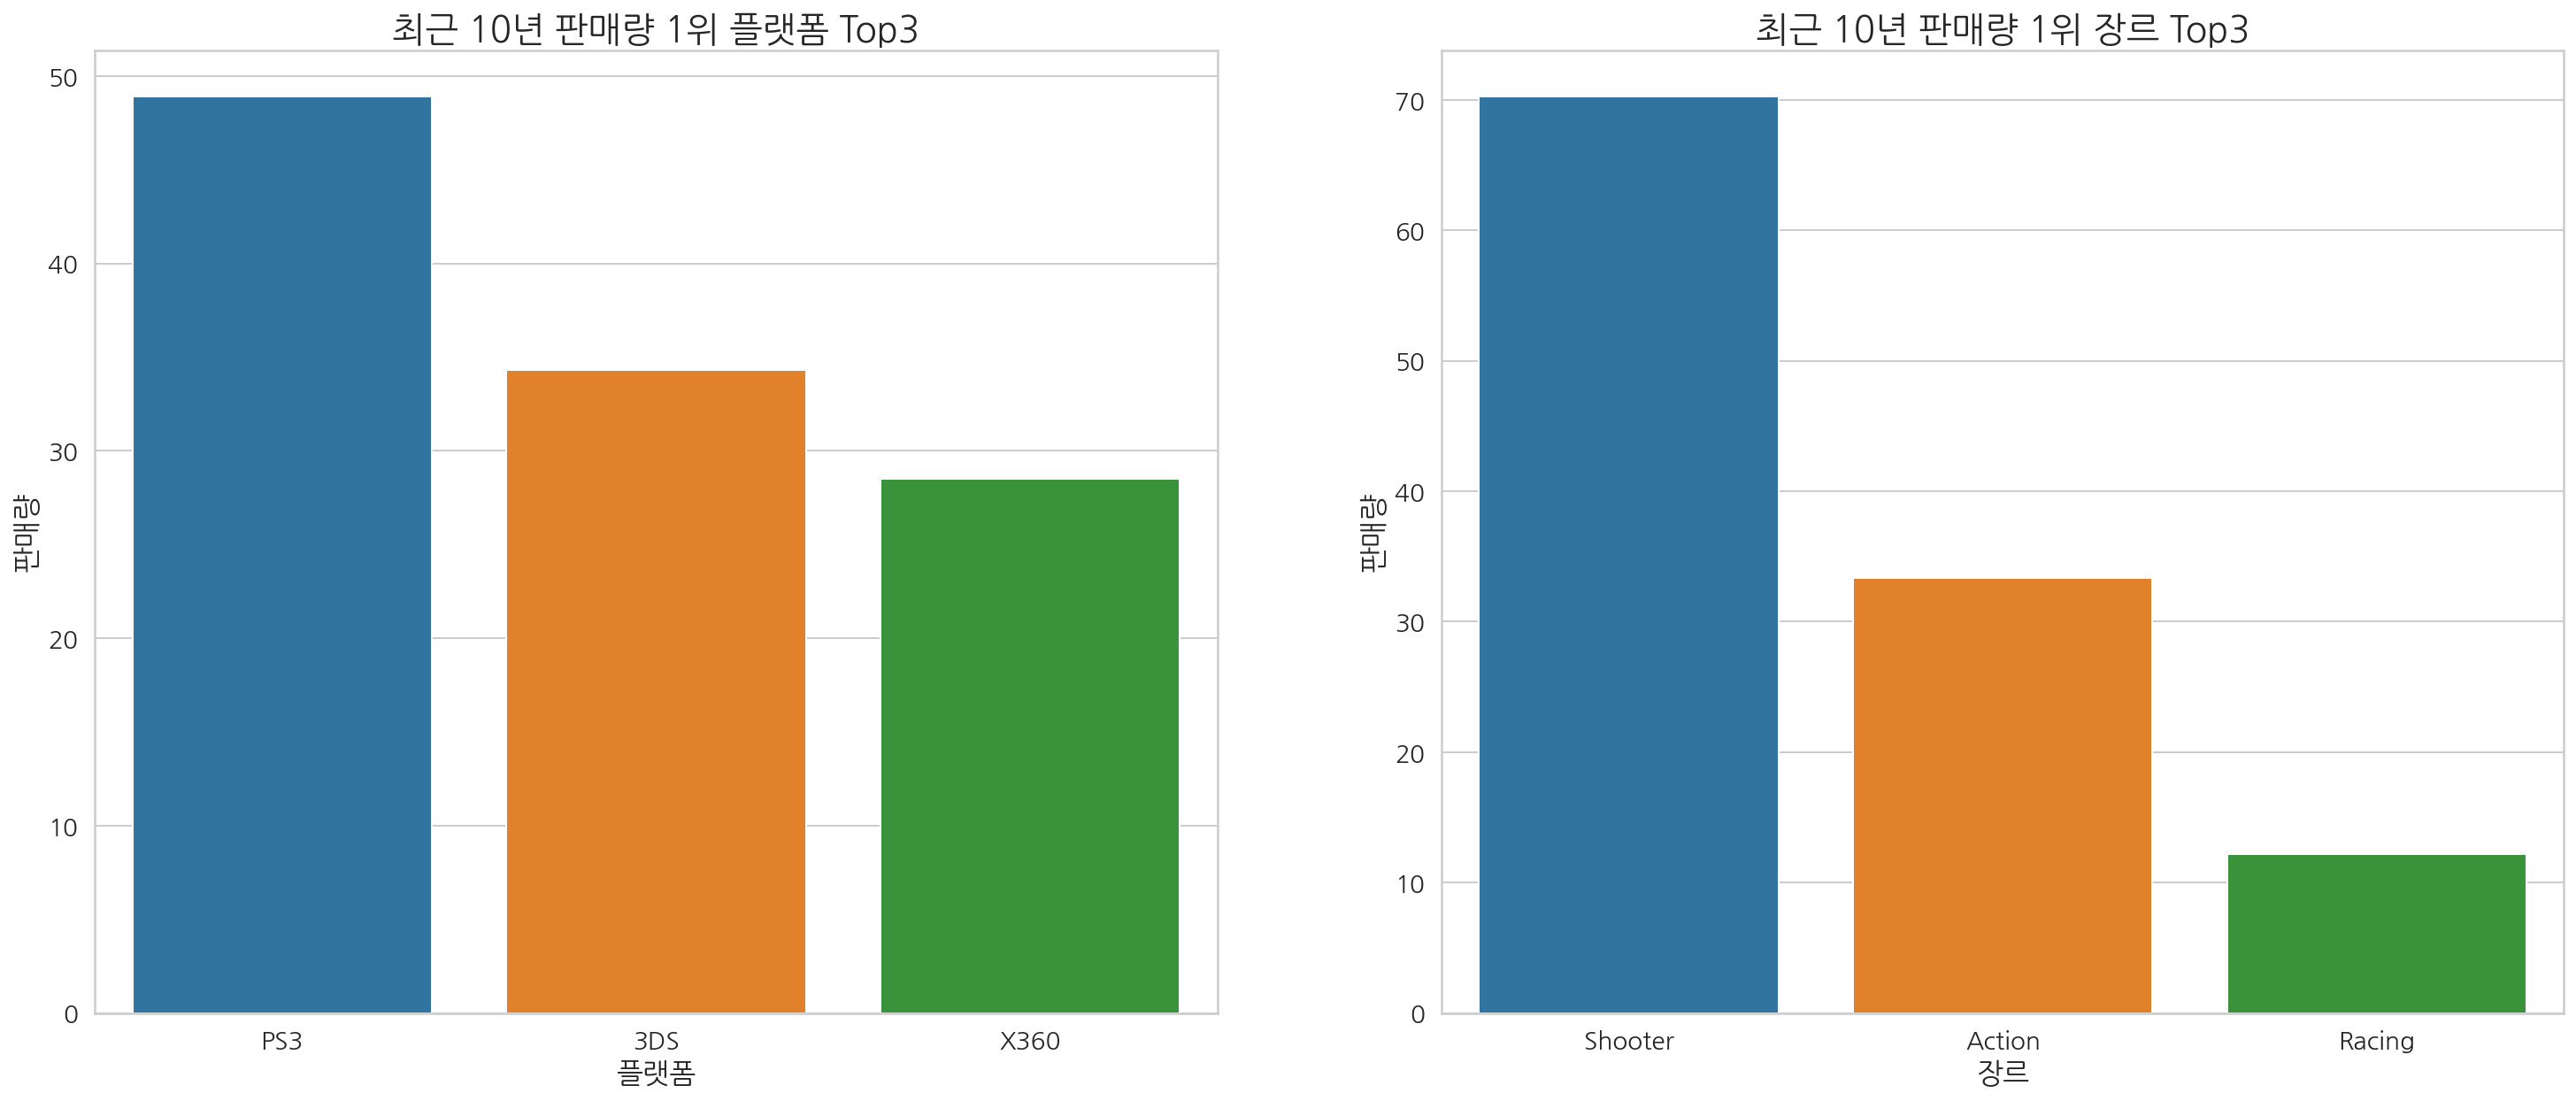

In [30]:
def recent_year_Top3_sales(df, col, sales):
    return df.groupby(col)[sales].sum().reset_index(name='sales').sort_values('sales', ascending=False).head(3)

platform_sales_top3 = recent_year_Top3_sales(year_sales_top_game, 'Platform', 'Total_Sales')

genre_sales_top3 = recent_year_Top3_sales(year_sales_top_game, 'Genre', 'Total_Sales')

data_list = [platform_sales_top3, genre_sales_top3]
titles = ['최근 10년 판매량 1위 플랫폼 Top3', '최근 10년 판매량 1위 장르 Top3']
x_labels = ['플랫폼', '장르']

fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=2)
for i, data, title in zip(range(3), data_list, titles):
    sns.barplot(x=data.iloc[:,0], y=data.iloc[:,1], ax=axs[i])
    axs[i].set_title(titles[i], fontsize=20)
    axs[i].tick_params(labelsize=14)
    axs[i].set_xlabel(x_labels[i], fontsize=16)
    axs[i].set_ylabel('판매량', fontsize=16)
plt.show()